# Augmentations

Ноутбук для разработки новых методов

## Load Data for Augmentation

Я использую первые 15 диалогов из валидации мультивоза

In [1]:
from datasets import load_dataset

dataset = load_dataset("multi_woz_v22")
dataset

No config specified, defaulting to: multi_woz_v22/v2.2_active_only
Reusing dataset multi_woz_v22 (/home/ilya/.cache/huggingface/datasets/multi_woz_v22/v2.2_active_only/2.2.0/7452f16a8b502e97df5c04cc4ee5436464762fa93b1ce778dd14181e79d8b51a)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['dialogue_id', 'services', 'turns'],
        num_rows: 8437
    })
    validation: Dataset({
        features: ['dialogue_id', 'services', 'turns'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['dialogue_id', 'services', 'turns'],
        num_rows: 1000
    })
})

In [2]:
import pandas as pd
import json

def to_csv(dataset, n_dialogues=15):
    """make data for all further experiments"""
    data = dataset['validation']['turns'][:n_dialogues]

    # get single list of utterances
    utterances = []
    speaker = []
    for dia in data:
        utterances.extend(dia['utterance'])
        speaker.extend(dia['speaker'])
    df = pd.DataFrame({'text': utterances})
    df.to_csv('aug-data/original.csv')
    json.dump(speaker, open('aug-data/speaker.json', 'w'))

    # lengths of dialogues (to be able to restore them and all dialogues from augmented utterances)
    rle = [len(dia['utterance']) for dia in data]
    json.dump(rle, open('aug-data/rle.json', 'w'))

def to_json(dataset, n_dialogues=15):
    """make data for all further experiments"""
    n_dialogues = 15

    dialogues = []
    for dia in dataset['validation']['turns'][:n_dialogues]:    
        dialogues.append([{'utterance': ut, 'speaker': sp} for ut, sp in zip(dia['utterance'], dia['speaker'])])
    
    json.dump(dialogues, open('aug-data/original.json', 'w'))

In [3]:
to_json(dataset)

## `textattack` package

[textattack augment](https://github.com/QData/TextAttack#augmenting-text-textattack-augment
)

В данный момент отказался от этого пакета. Слишком медленный.

### Embedding

Заменяем слово на другое слово, эмбеддинг которого ближе всех к эмбеддингу заменяемого слова 

In [1]:
! textattack augment\
    --input-csv aug-data/original.csv\
    --output-csv aug-data/embedding1.csv\
    --input-column text\
    --recipe embedding\
    --pct-words-to-swap .1\
    --transformations-per-example 1\
    --exclude-original

2023-07-29 22:05:42.307575: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 22:05:43.003568: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-29 22:05:45.185052: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-29 22:05:45.185456: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [3]:
! textattack augment\
    --input-csv aug-data/original.csv\
    --output-csv aug-data/embedding3.csv\
    --input-column text\
    --recipe embedding\
    --pct-words-to-swap .3\
    --transformations-per-example 1\
    --exclude-original

2023-07-29 22:11:09.489463: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 22:11:10.525161: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-29 22:11:13.182493: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-29 22:11:13.182931: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [4]:
! textattack augment\
    --input-csv aug-data/original.csv\
    --output-csv aug-data/embedding5.csv\
    --input-column text\
    --recipe embedding\
    --pct-words-to-swap .5\
    --transformations-per-example 1\
    --exclude-original

2023-07-29 22:11:56.250542: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 22:11:56.994763: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-29 22:11:59.231507: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-29 22:11:59.231928: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [5]:
from visualization_utils import show_augmented


for name in ['embedding1', 'embedding3', 'embedding5']:
    print(name)
    show_augmented(14, name)

embedding1


[A] I <span style='color:red;font-weight:700;text-decoration:line-through;'>need </span><span style='color:green;font-weight:700;'>require </span>a train from birmingham new street to cambridge, please. 

[B] There are 133 trains <span style='color:red;font-weight:700;text-decoration:line-through;'>traveling </span><span style='color:green;font-weight:700;'>trip </span>that path. What day would you like to travel on? 

[A] I would like to leave on <span style='color:red;font-weight:700;text-decoration:line-through;'>Wednesday </span><span style='color:green;font-weight:700;'>Monday </span>sometime after 11:30. 

[B] How about the TR1670? It meets your specifications and <span style='color:red;font-weight:700;text-decoration:line-through;'>leaves </span><span style='color:green;font-weight:700;'>sheets </span>at 11:40. 

[A] How <span style='color:red;font-weight:700;text-decoration:line-through;'>long </span><span style='color:green;font-weight:700;'>longue </span>is the train ride? 

[B] The train ride is 163 <span style='color:red;font-weight:700;text-decoration:line-through;'>minutes, </span><span style='color:green;font-weight:700;'>mins, </span>does this suit your needs? 

[A] <span style='color:red;font-weight:700;text-decoration:line-through;'>How </span><span style='color:green;font-weight:700;'>Mode </span>much is the fare on that train? 

[B] It is 75.10 <span style='color:red;font-weight:700;text-decoration:line-through;'>pounds. ¶ [A] What </span><span style='color:green;font-weight:700;'>pound. </span>

<span style='color:green;font-weight:700;'>[A] Quoi </span>is the exact arrival time? I'm also looking for a place to dine in the centre of town. I'm looking for an expensive modern european <span style='color:red;font-weight:700;text-decoration:line-through;'>restaurant. </span><span style='color:green;font-weight:700;'>lunchroom. </span>

[B] Let's take <span style='color:red;font-weight:700;text-decoration:line-through;'>care </span><span style='color:green;font-weight:700;'>healthcare </span>of the train first. The train will arrive by 14:23 in Cambridge. Would you like to book a <span style='color:red;font-weight:700;text-decoration:line-through;'>ticket? </span><span style='color:green;font-weight:700;'>tickets? </span>

[A] Thank you I do not <span style='color:red;font-weight:700;text-decoration:line-through;'>need to book </span><span style='color:green;font-weight:700;'>gotta to cookbook </span>the train, but I am looking for an expensive restaurant in the centre of town. 

[B] We have many expensive places in the center of town! Is there a <span style='color:red;font-weight:700;text-decoration:line-through;'>particular </span><span style='color:green;font-weight:700;'>singular </span>type of cuisine you'd <span style='color:red;font-weight:700;text-decoration:line-through;'>like </span><span style='color:green;font-weight:700;'>fond </span>to try? 

[A] I would like modern European <span style='color:red;font-weight:700;text-decoration:line-through;'>food. </span><span style='color:green;font-weight:700;'>diet. </span>

[B] How about darrys cookhouse and <span style='color:red;font-weight:700;text-decoration:line-through;'>wine </span><span style='color:green;font-weight:700;'>vineyard </span>shop? 

[A] Yeah that should work can I please get the <span style='color:red;font-weight:700;text-decoration:line-through;'>address </span><span style='color:green;font-weight:700;'>addressing </span>post code and phone number? 

[B] They are <span style='color:red;font-weight:700;text-decoration:line-through;'>located </span><span style='color:green;font-weight:700;'>positioned </span>at 40270 King Street City Centre. Postcode is cb11ln. Phone number is 01223505015. Can I book a <span style='color:red;font-weight:700;text-decoration:line-through;'>table </span><span style='color:green;font-weight:700;'>chalkboard </span>for you? 

[A] No thank you. I will go <span style='color:red;font-weight:700;text-decoration:line-through;'>ahead </span><span style='color:green;font-weight:700;'>upcoming </span>and book myself. Thank you so much. This was all the info I <span style='color:red;font-weight:700;text-decoration:line-through;'>needed. </span><span style='color:green;font-weight:700;'>required. </span>Have a good day. 

[B] <span style='color:red;font-weight:700;text-decoration:line-through;'>We </span><span style='color:green;font-weight:700;'>Ours </span>appreciate your business. Thank for using the Cambridge Towninfo centre! Have a great day!

embedding3


[A] I <span style='color:red;font-weight:700;text-decoration:line-through;'>need </span><span style='color:green;font-weight:700;'>needs </span>a train from birmingham <span style='color:red;font-weight:700;text-decoration:line-through;'>new </span><span style='color:green;font-weight:700;'>novo </span>street to cambridge, <span style='color:red;font-weight:700;text-decoration:line-through;'>please. </span><span style='color:green;font-weight:700;'>invites. </span>

[B] There are 133 trains <span style='color:red;font-weight:700;text-decoration:line-through;'>traveling </span><span style='color:green;font-weight:700;'>trips </span>that <span style='color:red;font-weight:700;text-decoration:line-through;'>path. </span><span style='color:green;font-weight:700;'>camino. </span>What day would you <span style='color:red;font-weight:700;text-decoration:line-through;'>like to travel </span><span style='color:green;font-weight:700;'>loves to trips </span>on? 

[A] I would <span style='color:red;font-weight:700;text-decoration:line-through;'>like to leave </span><span style='color:green;font-weight:700;'>iike to letting </span>on Wednesday <span style='color:red;font-weight:700;text-decoration:line-through;'>sometime </span><span style='color:green;font-weight:700;'>occasionally </span>after 11:30. 

[B] How about the TR1670? It <span style='color:red;font-weight:700;text-decoration:line-through;'>meets </span><span style='color:green;font-weight:700;'>fulfils </span>your <span style='color:red;font-weight:700;text-decoration:line-through;'>specifications and leaves </span><span style='color:green;font-weight:700;'>hallmarks and sheets </span>at 11:40. 

[A] How <span style='color:red;font-weight:700;text-decoration:line-through;'>long </span><span style='color:green;font-weight:700;'>longue </span>is the train ride? 

[B] The <span style='color:red;font-weight:700;text-decoration:line-through;'>train </span><span style='color:green;font-weight:700;'>forming </span>ride is 163 <span style='color:red;font-weight:700;text-decoration:line-through;'>minutes, </span><span style='color:green;font-weight:700;'>mins, </span>does this suit your <span style='color:red;font-weight:700;text-decoration:line-through;'>needs? </span><span style='color:green;font-weight:700;'>require? </span>

[A] How much is the <span style='color:red;font-weight:700;text-decoration:line-through;'>fare </span><span style='color:green;font-weight:700;'>tariffs </span>on that <span style='color:red;font-weight:700;text-decoration:line-through;'>train? </span><span style='color:green;font-weight:700;'>forming? </span>

[B] It is 75.10 <span style='color:red;font-weight:700;text-decoration:line-through;'>pounds. </span><span style='color:green;font-weight:700;'>lb. </span>

[A] What is the <span style='color:red;font-weight:700;text-decoration:line-through;'>exact </span><span style='color:green;font-weight:700;'>correct </span>arrival <span style='color:red;font-weight:700;text-decoration:line-through;'>time? </span><span style='color:green;font-weight:700;'>moment? </span>I'm <span style='color:red;font-weight:700;text-decoration:line-through;'>also looking </span><span style='color:green;font-weight:700;'>similarly researching </span>for a place to <span style='color:red;font-weight:700;text-decoration:line-through;'>dine in the centre of town. </span><span style='color:green;font-weight:700;'>lunches in the centers of cities. </span>I'm <span style='color:red;font-weight:700;text-decoration:line-through;'>looking </span><span style='color:green;font-weight:700;'>quest </span>for an expensive modern european restaurant. 

[B] Let's take care of the <span style='color:red;font-weight:700;text-decoration:line-through;'>train first. </span><span style='color:green;font-weight:700;'>forming outset. </span>The <span style='color:red;font-weight:700;text-decoration:line-through;'>train </span><span style='color:green;font-weight:700;'>forming </span>will <span style='color:red;font-weight:700;text-decoration:line-through;'>arrive </span><span style='color:green;font-weight:700;'>arrived </span>by 14:23 in Cambridge. Would you <span style='color:red;font-weight:700;text-decoration:line-through;'>like to book </span><span style='color:green;font-weight:700;'>likes to cookbook </span>a ticket? 

[A] <span style='color:red;font-weight:700;text-decoration:line-through;'>Thank </span><span style='color:green;font-weight:700;'>Thanks </span>you I do not <span style='color:red;font-weight:700;text-decoration:line-through;'>need </span><span style='color:green;font-weight:700;'>required </span>to book the <span style='color:red;font-weight:700;text-decoration:line-through;'>train, </span><span style='color:green;font-weight:700;'>forming, </span>but I am <span style='color:red;font-weight:700;text-decoration:line-through;'>looking </span><span style='color:green;font-weight:700;'>quest </span>for an expensive restaurant in the <span style='color:red;font-weight:700;text-decoration:line-through;'>centre of town. </span><span style='color:green;font-weight:700;'>centering of ciudad. </span>

[B] We have many expensive <span style='color:red;font-weight:700;text-decoration:line-through;'>places in the center of town! </span><span style='color:green;font-weight:700;'>sites in the centro of municipality! </span>Is there a <span style='color:red;font-weight:700;text-decoration:line-through;'>particular </span><span style='color:green;font-weight:700;'>especial </span>type of <span style='color:red;font-weight:700;text-decoration:line-through;'>cuisine </span><span style='color:green;font-weight:700;'>cooking </span>you'd <span style='color:red;font-weight:700;text-decoration:line-through;'>like </span><span style='color:green;font-weight:700;'>likes </span>to try? 

[A] I <span style='color:red;font-weight:700;text-decoration:line-through;'>would </span><span style='color:green;font-weight:700;'>ought </span>like modern European food. 

[B] How about darrys cookhouse and <span style='color:red;font-weight:700;text-decoration:line-through;'>wine shop? ¶ [A] Yeah </span><span style='color:green;font-weight:700;'>winemaking storing? </span>

<span style='color:green;font-weight:700;'>[A] Yep </span>that should <span style='color:red;font-weight:700;text-decoration:line-through;'>work </span><span style='color:green;font-weight:700;'>collaborating </span>can I <span style='color:red;font-weight:700;text-decoration:line-through;'>please </span><span style='color:green;font-weight:700;'>invite </span>get the <span style='color:red;font-weight:700;text-decoration:line-through;'>address </span><span style='color:green;font-weight:700;'>addresses </span>post code and phone number? 

[B] They are <span style='color:red;font-weight:700;text-decoration:line-through;'>located </span><span style='color:green;font-weight:700;'>situated </span>at 40270 <span style='color:red;font-weight:700;text-decoration:line-through;'>King </span><span style='color:green;font-weight:700;'>Emperor </span>Street City <span style='color:red;font-weight:700;text-decoration:line-through;'>Centre. </span><span style='color:green;font-weight:700;'>Centres. </span>Postcode is cb11ln. <span style='color:red;font-weight:700;text-decoration:line-through;'>Phone </span><span style='color:green;font-weight:700;'>Telefono </span>number is 01223505015. Can I <span style='color:red;font-weight:700;text-decoration:line-through;'>book a table </span><span style='color:green;font-weight:700;'>ledger a tables </span>for you? 

[A] <span style='color:red;font-weight:700;text-decoration:line-through;'>No thank </span><span style='color:green;font-weight:700;'>Nos gratitude </span>you. I will go ahead and <span style='color:red;font-weight:700;text-decoration:line-through;'>book </span><span style='color:green;font-weight:700;'>cookbook </span>myself. <span style='color:red;font-weight:700;text-decoration:line-through;'>Thank </span><span style='color:green;font-weight:700;'>Thanks </span>you so much. This was all the <span style='color:red;font-weight:700;text-decoration:line-through;'>info I needed. </span><span style='color:green;font-weight:700;'>informations I required. </span>Have a <span style='color:red;font-weight:700;text-decoration:line-through;'>good </span><span style='color:green;font-weight:700;'>buena </span>day. 

[B] We <span style='color:red;font-weight:700;text-decoration:line-through;'>appreciate </span><span style='color:green;font-weight:700;'>grateful </span>your business. Thank for <span style='color:red;font-weight:700;text-decoration:line-through;'>using </span><span style='color:green;font-weight:700;'>use </span>the Cambridge Towninfo <span style='color:red;font-weight:700;text-decoration:line-through;'>centre! </span><span style='color:green;font-weight:700;'>center! </span>Have a <span style='color:red;font-weight:700;text-decoration:line-through;'>great </span><span style='color:green;font-weight:700;'>gorgeous </span>day!

embedding5


[A] I <span style='color:red;font-weight:700;text-decoration:line-through;'>need a train </span><span style='color:green;font-weight:700;'>required a forming </span>from birmingham <span style='color:red;font-weight:700;text-decoration:line-through;'>new street </span><span style='color:green;font-weight:700;'>newest thoroughfare </span>to cambridge, <span style='color:red;font-weight:700;text-decoration:line-through;'>please. </span><span style='color:green;font-weight:700;'>invites. </span>

[B] There are 133 trains <span style='color:red;font-weight:700;text-decoration:line-through;'>traveling </span><span style='color:green;font-weight:700;'>travel </span>that <span style='color:red;font-weight:700;text-decoration:line-through;'>path. What </span><span style='color:green;font-weight:700;'>trajectories. Quel </span>day <span style='color:red;font-weight:700;text-decoration:line-through;'>would you like to travel </span><span style='color:green;font-weight:700;'>ought you iike to travelling </span>on? 

[A] I <span style='color:red;font-weight:700;text-decoration:line-through;'>would like to leave </span><span style='color:green;font-weight:700;'>ought likes to walkout </span>on <span style='color:red;font-weight:700;text-decoration:line-through;'>Wednesday sometime </span><span style='color:green;font-weight:700;'>Yesterday sometimes </span>after 11:30. 

[B] <span style='color:red;font-weight:700;text-decoration:line-through;'>How </span><span style='color:green;font-weight:700;'>Mode </span>about the TR1670? It <span style='color:red;font-weight:700;text-decoration:line-through;'>meets </span><span style='color:green;font-weight:700;'>fulfils </span>your <span style='color:red;font-weight:700;text-decoration:line-through;'>specifications and leaves </span><span style='color:green;font-weight:700;'>hallmarks and departs </span>at 11:40. 

[A] <span style='color:red;font-weight:700;text-decoration:line-through;'>How long is the train </span><span style='color:green;font-weight:700;'>Mode lang is the forming </span>ride? 

[B] The <span style='color:red;font-weight:700;text-decoration:line-through;'>train </span><span style='color:green;font-weight:700;'>forming </span>ride is 163 <span style='color:red;font-weight:700;text-decoration:line-through;'>minutes, </span><span style='color:green;font-weight:700;'>mins, </span>does this suit your <span style='color:red;font-weight:700;text-decoration:line-through;'>needs? ¶ [A] How much is the fare </span><span style='color:green;font-weight:700;'>should? </span>

<span style='color:green;font-weight:700;'>[A] Mode very is the tariffs </span>on that <span style='color:red;font-weight:700;text-decoration:line-through;'>train? </span><span style='color:green;font-weight:700;'>forming? </span>

[B] It is 75.10 <span style='color:red;font-weight:700;text-decoration:line-through;'>pounds. </span><span style='color:green;font-weight:700;'>pound. </span>

[A] What is the <span style='color:red;font-weight:700;text-decoration:line-through;'>exact arrival time? </span><span style='color:green;font-weight:700;'>precision coming times? </span>I'm <span style='color:red;font-weight:700;text-decoration:line-through;'>also looking for a place to dine in the centre of town. </span><span style='color:green;font-weight:700;'>moreover searching for a placing to dinner in the centered of urban. </span>I'm <span style='color:red;font-weight:700;text-decoration:line-through;'>looking </span><span style='color:green;font-weight:700;'>quest </span>for an expensive <span style='color:red;font-weight:700;text-decoration:line-through;'>modern european restaurant. </span><span style='color:green;font-weight:700;'>fashionable europe restaurants. </span>

[B] Let's <span style='color:red;font-weight:700;text-decoration:line-through;'>take care of the train first. </span><span style='color:green;font-weight:700;'>taking caring of the forming firstly. </span>The <span style='color:red;font-weight:700;text-decoration:line-through;'>train </span><span style='color:green;font-weight:700;'>forming </span>will <span style='color:red;font-weight:700;text-decoration:line-through;'>arrive </span><span style='color:green;font-weight:700;'>come </span>by 14:23 in <span style='color:red;font-weight:700;text-decoration:line-through;'>Cambridge. Would you like to book a ticket? ¶ [A] Thank </span><span style='color:green;font-weight:700;'>Oxford. Ought you loves to ledger a airfare? </span>

<span style='color:green;font-weight:700;'>[A] Thanked </span>you I do not <span style='color:red;font-weight:700;text-decoration:line-through;'>need to book the train, </span><span style='color:green;font-weight:700;'>necessary to cookbook the forming, </span>but I am <span style='color:red;font-weight:700;text-decoration:line-through;'>looking </span><span style='color:green;font-weight:700;'>quest </span>for an <span style='color:green;font-weight:700;'>pricey lunchroom in the centers of municipal. </span>

<span style='color:green;font-weight:700;'>[B] Ours have innumerable </span>expensive <span style='color:red;font-weight:700;text-decoration:line-through;'>restaurant in the centre of town. ¶ [B] We have many expensive places in the center of town! </span><span style='color:green;font-weight:700;'>spaces in the centres of ville! </span>Is there a <span style='color:red;font-weight:700;text-decoration:line-through;'>particular type of cuisine </span><span style='color:green;font-weight:700;'>peculiar types of gastronomy </span>you'd <span style='color:red;font-weight:700;text-decoration:line-through;'>like to try? </span><span style='color:green;font-weight:700;'>adores to strive? </span>

[A] I would <span style='color:red;font-weight:700;text-decoration:line-through;'>like modern </span><span style='color:green;font-weight:700;'>loves modernity </span>European <span style='color:red;font-weight:700;text-decoration:line-through;'>food. ¶ [B] How </span><span style='color:green;font-weight:700;'>nutritional. </span>

<span style='color:green;font-weight:700;'>[B] Mode </span>about darrys cookhouse and <span style='color:red;font-weight:700;text-decoration:line-through;'>wine shop? ¶ [A] Yeah </span><span style='color:green;font-weight:700;'>vin stores? </span>

<span style='color:green;font-weight:700;'>[A] Yup </span>that should <span style='color:red;font-weight:700;text-decoration:line-through;'>work </span><span style='color:green;font-weight:700;'>worked </span>can I <span style='color:red;font-weight:700;text-decoration:line-through;'>please get the address </span><span style='color:green;font-weight:700;'>invite obtains the solve </span>post <span style='color:red;font-weight:700;text-decoration:line-through;'>code and phone </span><span style='color:green;font-weight:700;'>codes and telephone </span>number? 

[B] They are <span style='color:red;font-weight:700;text-decoration:line-through;'>located </span><span style='color:green;font-weight:700;'>positioned </span>at 40270 <span style='color:red;font-weight:700;text-decoration:line-through;'>King Street City Centre. </span><span style='color:green;font-weight:700;'>Emperor Rue Town Centres. </span>Postcode is cb11ln. <span style='color:red;font-weight:700;text-decoration:line-through;'>Phone </span><span style='color:green;font-weight:700;'>Tel </span>number is 01223505015. Can I <span style='color:red;font-weight:700;text-decoration:line-through;'>book a table </span><span style='color:green;font-weight:700;'>ledger a tableau </span>for you? 

[A] <span style='color:red;font-weight:700;text-decoration:line-through;'>No thank </span><span style='color:green;font-weight:700;'>Not thanks </span>you. I will <span style='color:red;font-weight:700;text-decoration:line-through;'>go ahead and book </span><span style='color:green;font-weight:700;'>going forthcoming and ledger </span>myself. <span style='color:red;font-weight:700;text-decoration:line-through;'>Thank </span><span style='color:green;font-weight:700;'>Thanking </span>you so <span style='color:red;font-weight:700;text-decoration:line-through;'>much. </span><span style='color:green;font-weight:700;'>very. </span>This was all the <span style='color:red;font-weight:700;text-decoration:line-through;'>info I needed. Have a good </span><span style='color:green;font-weight:700;'>informational I require. Had a alright </span>day. 

[B] We <span style='color:red;font-weight:700;text-decoration:line-through;'>appreciate </span><span style='color:green;font-weight:700;'>grateful </span>your <span style='color:red;font-weight:700;text-decoration:line-through;'>business. Thank for using </span><span style='color:green;font-weight:700;'>firms. Thanked for employs </span>the Cambridge Towninfo <span style='color:red;font-weight:700;text-decoration:line-through;'>centre! Have a great </span><span style='color:green;font-weight:700;'>centres! Has a resplendent </span>day!

Безконтекстная замена создает грамматические ошибки

### Checklist

Заменить названия, числа, удлиннить или укоротить фразы.

In [1]:
! textattack augment\
    --input-csv aug-data/original.csv\
    --output-csv aug-data/checklist1.csv\
    --input-column text\
    --recipe checklist\
    --pct-words-to-swap .1\
    --transformations-per-example 1\
    --exclude-original

2023-07-29 22:19:59.199016: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 22:20:00.260409: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-29 22:20:04.345714: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-29 22:20:04.346156: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [2]:
! textattack augment\
    --input-csv aug-data/original.csv\
    --output-csv aug-data/checklist3.csv\
    --input-column text\
    --recipe checklist\
    --pct-words-to-swap .3\
    --transformations-per-example 1\
    --exclude-original

2023-07-29 22:24:21.229723: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 22:24:21.996574: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-29 22:24:24.224325: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-29 22:24:24.224736: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [2]:
! textattack augment\
    --input-csv aug-data/original.csv\
    --output-csv aug-data/checklist5.csv\
    --input-column text\
    --recipe checklist\
    --pct-words-to-swap .5\
    --transformations-per-example 1\
    --exclude-original

2023-07-29 22:34:21.390622: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 22:34:22.038400: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-29 22:34:24.171847: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-29 22:34:24.172271: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [36]:
from visualization_utils import show_augmented


for name in ['embedding1', 'embedding3', 'embedding5']:
    print(f'======= {name} =======')
    show_augmented(14, name)

[A] I need a train from <span style='color:red;font-weight:700;text-decoration:line-through;'>birmingham </span><span style='color:green;font-weight:700;'>St. Cloud </span>new street to cambridge, please. 

[B] There are <span style='color:red;font-weight:700;text-decoration:line-through;'>133 </span><span style='color:green;font-weight:700;'>93 </span>trains traveling that path. What day would you like to travel on? 

[A] I would like to leave on Wednesday sometime after <span style='color:red;font-weight:700;text-decoration:line-through;'>11:30. </span><span style='color:green;font-weight:700;'>11:4. </span>

[B] How about the TR1670? It meets your specifications and leaves at <span style='color:red;font-weight:700;text-decoration:line-through;'>11:40. </span><span style='color:green;font-weight:700;'>13:40. </span>

[A] How long is the train ride? 

[B] The train ride is <span style='color:red;font-weight:700;text-decoration:line-through;'>163 </span><span style='color:green;font-weight:700;'>249 </span>minutes, does this suit your needs? 

[A] How much is the fare on that train? 

[B] It is <span style='color:red;font-weight:700;text-decoration:line-through;'>75.10 </span><span style='color:green;font-weight:700;'>75.16 </span>pounds. 

[A] What is the exact arrival time? I'm also looking for a place to dine in the centre of town. <span style='color:red;font-weight:700;text-decoration:line-through;'>I'm </span><span style='color:green;font-weight:700;'>I am </span>looking for an expensive modern european restaurant. 

[B] <span style='color:red;font-weight:700;text-decoration:line-through;'>Let's </span><span style='color:green;font-weight:700;'>Shon </span>take care of the train first. The train will arrive by <span style='color:red;font-weight:700;text-decoration:line-through;'>14:23 </span><span style='color:green;font-weight:700;'>14:37 </span>in Cambridge. Would you like to book a ticket? 

[A] Thank you I <span style='color:red;font-weight:700;text-decoration:line-through;'>do not </span><span style='color:green;font-weight:700;'>don't </span>need to book the train, but <span style='color:red;font-weight:700;text-decoration:line-through;'>I am </span><span style='color:green;font-weight:700;'>I'm </span>looking for an expensive restaurant in the centre of town. 

[B] We have many expensive places in the center of town! Is there a particular type of cuisine <span style='color:red;font-weight:700;text-decoration:line-through;'>you'd </span><span style='color:green;font-weight:700;'>you would </span>like to try? 

[A] <span style='color:red;font-weight:700;text-decoration:line-through;'>I would </span><span style='color:green;font-weight:700;'>I'd </span>like modern European food. 

[B] How about darrys cookhouse and wine shop? 

[A] Yeah that should work can I please get the address post code and phone number? 

[B] They are located at <span style='color:red;font-weight:700;text-decoration:line-through;'>40270 </span><span style='color:green;font-weight:700;'>35271 </span>King Street City Centre. Postcode is cb11ln. Phone number is <span style='color:red;font-weight:700;text-decoration:line-through;'>01223505015. </span><span style='color:green;font-weight:700;'>46547340. </span>Can I book a table for you? 

[A] No thank you. <span style='color:red;font-weight:700;text-decoration:line-through;'>I will </span><span style='color:green;font-weight:700;'>I'll </span>go ahead and book myself. Thank you so much. This was all the info I needed. Have a good day. 

[B] We appreciate your business. Thank for using the Cambridge Towninfo centre! Have a great day!

### CLARE

Это супер медленно!

Заменяем токены, вставляем, соединяем и заменяем --- с помощью MLM.

In [54]:
! textattack augment\
    --input-csv aug-data/original.csv\
    --output-csv aug-data/clare1.csv\
    --input-column text\
    --recipe clare\
    --pct-words-to-swap .1\
    --transformations-per-example 1\
    --exclude-original

2023-07-28 16:24:01.653839: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-28 16:24:02.255426: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-28 16:24:04.327086: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-28 16:24:04.327460: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [1]:
! textattack augment\
    --input-csv aug-data/original.csv\
    --output-csv aug-data/clare3.csv\
    --input-column text\
    --recipe clare\
    --pct-words-to-swap .3\
    --transformations-per-example 1\
    --exclude-original

2023-07-29 23:06:27.875263: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 23:06:28.639759: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-29 23:06:31.112069: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-29 23:06:31.112455: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [2]:
! textattack augment\
    --input-csv aug-data/original.csv\
    --output-csv aug-data/clare5.csv\
    --input-column text\
    --recipe clare\
    --pct-words-to-swap .5\
    --transformations-per-example 1\
    --exclude-original

2023-07-29 23:33:36.109604: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 23:33:36.683459: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-29 23:33:38.520308: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-29 23:33:38.520671: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [4]:
from visualization_utils import show_augmented


for name in ['clare1', 'clare3', 'clare5']:
    print(f'======= {name} =======')
    show_augmented(14, name)

======= clare =======


[A] I need a <span style='color:green;font-weight:700;'>carriage </span>train from birmingham new street to cambridge, please. 

[B] There are <span style='color:green;font-weight:700;'>about </span>133 trains traveling that path. What day would you like to travel on? 

[A] I <span style='color:green;font-weight:700;'>absolutely </span>would like to leave on Wednesday sometime after 11:30. 

[B] How about the TR1670? It meets your specifications and leaves at <span style='color:green;font-weight:700;'>the </span>11:40. 

[A] How long is <span style='color:green;font-weight:700;'>not </span>the train ride? 

[B] The train ride is <span style='color:green;font-weight:700;'>barely </span>163 minutes, does this suit your needs? 

[A] How much is the fare <span style='color:green;font-weight:700;'>calculated </span>on that train? 

[B] It is 75.10 <span style='color:green;font-weight:700;'>lb </span>pounds. 

[A] What is <span style='color:green;font-weight:700;'>often </span>the exact arrival time? I'm also looking for a place to dine in the centre of town. I'm looking for an expensive modern european restaurant. 

[B] Let's take care of the train <span style='color:red;font-weight:700;text-decoration:line-through;'>first. </span><span style='color:green;font-weight:700;'>logistics. </span>The train will arrive by 14:23 in Cambridge. Would you like to book a <span style='color:green;font-weight:700;'>tour </span>ticket? 

[A] Thank you <span style='color:green;font-weight:700;'>guys </span>I do not need to book the train, but I am looking for an expensive restaurant in the centre of town. 

[B] We have many expensive places in the center of town! Is there a particular type <span style='color:green;font-weight:700;'>fare </span>of cuisine you'd like to try? 

[A] I would like modern <span style='color:red;font-weight:700;text-decoration:line-through;'>European </span><span style='color:green;font-weight:700;'>Asian </span>food. 

[B] How about darrys cookhouse and wine <span style='color:green;font-weight:700;'>glasses </span>shop? 

[A] Yeah that should work can I please <span style='color:green;font-weight:700;'>try </span>get the address post code and phone number? 

[B] They are located at 40270 King <span style='color:red;font-weight:700;text-decoration:line-through;'>Street City </span><span style='color:green;font-weight:700;'>don </span>Centre. <span style='color:red;font-weight:700;text-decoration:line-through;'>Postcode </span><span style='color:green;font-weight:700;'>Name </span>is cb11ln. Phone number is 01223505015. Can I book a table for you? 

[A] No thank you. I will go ahead and book myself. <span style='color:green;font-weight:700;'>Seriously </span>Thank you so much. This was all the info I needed. Have a good day. 

[B] We appreciate your <span style='color:red;font-weight:700;text-decoration:line-through;'>business. </span><span style='color:green;font-weight:700;'>inconvenience. </span>Thank for using the Cambridge Towninfo centre! Have a great day!

======= clare3 =======


[A] I need a train from <span style='color:red;font-weight:700;text-decoration:line-through;'>birmingham </span><span style='color:green;font-weight:700;'>whole </span>new street to <span style='color:green;font-weight:700;'>stupid </span>cambridge, please. 

[B] There are 133 trains traveling <span style='color:green;font-weight:700;'>parallel </span>that path. What <span style='color:red;font-weight:700;text-decoration:line-through;'>day </span><span style='color:green;font-weight:700;'>paths longer </span>would you like to travel on? 

[A] <span style='color:red;font-weight:700;text-decoration:line-through;'>I </span><span style='color:green;font-weight:700;'>They </span>would like to leave on Wednesday sometime after <span style='color:green;font-weight:700;'>this </span>11:30. 

[B] How about <span style='color:green;font-weight:700;'>replacing </span>the TR1670? It meets your specifications and <span style='color:red;font-weight:700;text-decoration:line-through;'>leaves </span><span style='color:green;font-weight:700;'>start </span>at 11:40. 

[A] How long is the train <span style='color:red;font-weight:700;text-decoration:line-through;'>ride? </span><span style='color:green;font-weight:700;'>up? </span>

[B] The <span style='color:green;font-weight:700;'>shortest </span>train ride is 163 minutes, does this suit your <span style='color:green;font-weight:700;'>ride </span>needs? 

[A] How much is the <span style='color:red;font-weight:700;text-decoration:line-through;'>fare </span><span style='color:green;font-weight:700;'>pineapple </span>on that <span style='color:red;font-weight:700;text-decoration:line-through;'>train? </span><span style='color:green;font-weight:700;'>burger? </span>

[B] It is <span style='color:red;font-weight:700;text-decoration:line-through;'>75.10 </span><span style='color:green;font-weight:700;'>75.Average 10 </span>pounds. 

[A] What is the <span style='color:green;font-weight:700;'>tourists </span>exact arrival time? I'm <span style='color:green;font-weight:700;'>then </span>also looking for a place to dine in the centre <span style='color:green;font-weight:700;'>circle </span>of town. <span style='color:red;font-weight:700;text-decoration:line-through;'>I'm </span><span style='color:green;font-weight:700;'>But </span>looking for an expensive modern european <span style='color:red;font-weight:700;text-decoration:line-through;'>restaurant. </span><span style='color:green;font-weight:700;'>inn. </span>

[B] Let's take care <span style='color:red;font-weight:700;text-decoration:line-through;'>of the train first. </span><span style='color:green;font-weight:700;'>details of the train etiquette. </span>The train will arrive by 14:23 in Cambridge. Would you <span style='color:green;font-weight:700;'>even </span>like to book a <span style='color:green;font-weight:700;'>quicker </span>ticket? 

[A] Thank you I do <span style='color:green;font-weight:700;'>certainly </span>not need to book <span style='color:green;font-weight:700;'>up </span>the train, but I am looking for <span style='color:green;font-weight:700;'>only </span>an expensive restaurant in the <span style='color:red;font-weight:700;text-decoration:line-through;'>centre </span><span style='color:green;font-weight:700;'>name </span>of town. 

[B] We have many expensive places in the center <span style='color:red;font-weight:700;text-decoration:line-through;'>of </span><span style='color:green;font-weight:700;'>downtown of Boston </span>town! Is there a particular type of cuisine you'd like to <span style='color:green;font-weight:700;'>personally </span>try? 

[A] I would like <span style='color:red;font-weight:700;text-decoration:line-through;'>modern European </span><span style='color:green;font-weight:700;'>healthier </span>food. 

[B] How about darrys cookhouse and wine <span style='color:green;font-weight:700;'>bottle </span>shop? 

[A] Yeah that should work can I <span style='color:green;font-weight:700;'>ma </span>please get <span style='color:green;font-weight:700;'>thru </span>the address post code and phone number? 

[B] They are <span style='color:red;font-weight:700;text-decoration:line-through;'>located </span><span style='color:green;font-weight:700;'>currently </span>at 40270 King <span style='color:red;font-weight:700;text-decoration:line-through;'>Street City </span><span style='color:green;font-weight:700;'>Shopping </span>Centre. Postcode <span style='color:green;font-weight:700;'>numbers </span>is cb11ln. Phone number is 01223505015. Can I <span style='color:green;font-weight:700;'>actually </span>book a table for you? 

[A] No <span style='color:green;font-weight:700;'>worries </span>thank you. I will <span style='color:green;font-weight:700;'>soon </span>go ahead and book myself. Thank you so much. <span style='color:red;font-weight:700;text-decoration:line-through;'>This </span><span style='color:green;font-weight:700;'>Inside </span>was all the info I needed. Have a good <span style='color:green;font-weight:700;'>business </span>day. 

[B] We appreciate your business. <span style='color:green;font-weight:700;'>More </span>Thank for using the Cambridge Towninfo centre! <span style='color:green;font-weight:700;'>Your </span>Have a <span style='color:red;font-weight:700;text-decoration:line-through;'>great </span><span style='color:green;font-weight:700;'>decent </span>day!

======= clare5 =======


[A] I need <span style='color:red;font-weight:700;text-decoration:line-through;'>a </span><span style='color:green;font-weight:700;'>send a wooden </span>train from birmingham new <span style='color:green;font-weight:700;'>ish </span>street to cambridge, please. 

[B] There are 133 <span style='color:red;font-weight:700;text-decoration:line-through;'>trains traveling that </span><span style='color:green;font-weight:700;'>miles walking </span>path. What day <span style='color:green;font-weight:700;'>routes </span>would <span style='color:red;font-weight:700;text-decoration:line-through;'>you like to </span><span style='color:green;font-weight:700;'>take you like to do </span>travel on? 

[A] I would like <span style='color:red;font-weight:700;text-decoration:line-through;'>to </span><span style='color:green;font-weight:700;'>you to soon </span>leave on <span style='color:green;font-weight:700;'>Sheffield </span>Wednesday sometime after 11:30. 

[B] <span style='color:red;font-weight:700;text-decoration:line-through;'>How </span><span style='color:green;font-weight:700;'>Asked </span>about the TR1670? <span style='color:red;font-weight:700;text-decoration:line-through;'>It meets </span><span style='color:green;font-weight:700;'>UPS set </span>your <span style='color:red;font-weight:700;text-decoration:line-through;'>specifications </span><span style='color:green;font-weight:700;'>deadline </span>and <span style='color:green;font-weight:700;'>Santa </span>leaves at 11:40. 

[A] How <span style='color:red;font-weight:700;text-decoration:line-through;'>long </span><span style='color:green;font-weight:700;'>predictable BART </span>is the train <span style='color:red;font-weight:700;text-decoration:line-through;'>ride? </span><span style='color:green;font-weight:700;'>station? </span>

[B] The <span style='color:red;font-weight:700;text-decoration:line-through;'>train ride </span><span style='color:green;font-weight:700;'>demo format </span>is 163 minutes, does this <span style='color:green;font-weight:700;'>not </span>suit your <span style='color:red;font-weight:700;text-decoration:line-through;'>needs? </span><span style='color:green;font-weight:700;'>specifications? </span>

[A] How <span style='color:green;font-weight:700;'>else </span>much is the fare <span style='color:green;font-weight:700;'>tag </span>on that train? 

[B] It is <span style='color:red;font-weight:700;text-decoration:line-through;'>75.10 pounds. </span><span style='color:green;font-weight:700;'>75.Just 10 degrees. </span>

[A] What is <span style='color:green;font-weight:700;'>indeed </span>the exact arrival time? I'm also looking for a place to <span style='color:green;font-weight:700;'>traditionally </span>dine in <span style='color:green;font-weight:700;'>inside </span>the centre of town. I'm <span style='color:red;font-weight:700;text-decoration:line-through;'>looking for </span><span style='color:green;font-weight:700;'>going for only </span>an <span style='color:green;font-weight:700;'>uber </span>expensive modern european <span style='color:green;font-weight:700;'>neighbourhood </span>restaurant. 

[B] Let's take care <span style='color:green;font-weight:700;'>all </span>of the train first. The <span style='color:green;font-weight:700;'>passenger </span>train will arrive <span style='color:green;font-weight:700;'>tomorrow </span>by 14:23 <span style='color:green;font-weight:700;'>BST </span>in Cambridge. Would you like to book <span style='color:red;font-weight:700;text-decoration:line-through;'>a </span><span style='color:green;font-weight:700;'>on a standby </span>ticket? 

[A] Thank you I <span style='color:green;font-weight:700;'>simply </span>do not <span style='color:red;font-weight:700;text-decoration:line-through;'>need </span><span style='color:green;font-weight:700;'>HAVE </span>to book the <span style='color:green;font-weight:700;'>entire </span>train, <span style='color:green;font-weight:700;'>no </span>but <span style='color:green;font-weight:700;'>perhaps </span>I am looking <span style='color:green;font-weight:700;'>ahead </span>for an expensive restaurant in the <span style='color:red;font-weight:700;text-decoration:line-through;'>centre </span><span style='color:green;font-weight:700;'>corner </span>of town. 

[B] We have <span style='color:green;font-weight:700;'>to </span>many expensive places in <span style='color:green;font-weight:700;'>Charlotte </span>the center of town! Is there a <span style='color:green;font-weight:700;'>pretty </span>particular type of cuisine you'd like <span style='color:red;font-weight:700;text-decoration:line-through;'>to </span><span style='color:green;font-weight:700;'>guys to finally </span>try? 

[A] I <span style='color:green;font-weight:700;'>too </span>would like modern <span style='color:green;font-weight:700;'>ized </span>European food. 

[B] How <span style='color:green;font-weight:700;'>goes </span>about <span style='color:red;font-weight:700;text-decoration:line-through;'>darrys </span><span style='color:green;font-weight:700;'>vegetarian </span>cookhouse and <span style='color:red;font-weight:700;text-decoration:line-through;'>wine </span><span style='color:green;font-weight:700;'>butcher </span>shop? 

[A] <span style='color:red;font-weight:700;text-decoration:line-through;'>Yeah </span><span style='color:green;font-weight:700;'>So </span>that <span style='color:green;font-weight:700;'>thing </span>should work can I please <span style='color:green;font-weight:700;'>you </span>get the address <span style='color:green;font-weight:700;'>plus </span>post code and <span style='color:red;font-weight:700;text-decoration:line-through;'>phone </span><span style='color:green;font-weight:700;'>subscriber </span>number? 

[B] They are <span style='color:red;font-weight:700;text-decoration:line-through;'>located </span><span style='color:green;font-weight:700;'>currently </span>at 40270 King <span style='color:red;font-weight:700;text-decoration:line-through;'>Street </span><span style='color:green;font-weight:700;'>Auckland </span>City Centre. Postcode <span style='color:green;font-weight:700;'>Card </span>is cb11ln. <span style='color:red;font-weight:700;text-decoration:line-through;'>Phone </span><span style='color:green;font-weight:700;'>Account Group </span>number <span style='color:green;font-weight:700;'>ID </span>is 01223505015. Can I book a table <span style='color:green;font-weight:700;'>arrangement </span>for you? 

[A] No <span style='color:green;font-weight:700;'>sir </span>thank you. I will <span style='color:red;font-weight:700;text-decoration:line-through;'>go </span><span style='color:green;font-weight:700;'>follow up </span>ahead and book <span style='color:green;font-weight:700;'>list </span>myself. <span style='color:green;font-weight:700;'>Okay </span>Thank you <span style='color:green;font-weight:700;'>by </span>so much. This was all the <span style='color:red;font-weight:700;text-decoration:line-through;'>info </span><span style='color:green;font-weight:700;'>training </span>I needed. Have a good day. 

[B] We appreciate <span style='color:green;font-weight:700;'>opening </span>your business. <span style='color:green;font-weight:700;'>SS </span>Thank for using the Cambridge <span style='color:red;font-weight:700;text-decoration:line-through;'>Towninfo </span><span style='color:green;font-weight:700;'>events business </span>centre! Have a great day!

### Easy Data Augmentation

Это супер быстро!

An implementation of Easy Data Augmentation, which combines:

- WordNet synonym replacement
    - Randomly replace words with their synonyms.
- Word deletion
    - Randomly remove words from the sentence.
- Word order swaps
    - Randomly swap the position of words in the sentence.
- Random synonym insertion
    - Insert a random synonym of a random word at a random location.

In [7]:
! textattack augment\
    --input-csv aug-data/original.csv\
    --output-csv aug-data/eda1.csv\
    --input-column text\
    --recipe eda\
    --pct-words-to-swap .1\
    --transformations-per-example 1\
    --exclude-original

2023-07-29 22:55:47.601277: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 22:55:48.305955: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-29 22:55:50.362310: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-29 22:55:50.362663: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [6]:
! textattack augment\
    --input-csv aug-data/original.csv\
    --output-csv aug-data/eda3.csv\
    --input-column text\
    --recipe eda\
    --pct-words-to-swap .3\
    --transformations-per-example 1\
    --exclude-original

2023-07-29 22:55:12.114556: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 22:55:12.791880: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-29 22:55:14.817800: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-29 22:55:14.818226: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [8]:
! textattack augment\
    --input-csv aug-data/original.csv\
    --output-csv aug-data/eda5.csv\
    --input-column text\
    --recipe eda\
    --pct-words-to-swap .5\
    --transformations-per-example 1\
    --exclude-original

2023-07-29 22:56:05.174414: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 22:56:05.932334: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-29 22:56:08.404231: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-29 22:56:08.404716: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [9]:
from visualization_utils import show_augmented


for name in ['eda1', 'eda3', 'eda5']:
    print(f'======= {name} =======')
    show_augmented(14, name)

======= eda1 =======


[A] I <span style='color:red;font-weight:700;text-decoration:line-through;'>need </span><span style='color:green;font-weight:700;'>require </span>a train from birmingham new street to cambridge, please. 

[B] There are 133 trains traveling that path. What <span style='color:green;font-weight:700;'>to would you like </span>day <span style='color:red;font-weight:700;text-decoration:line-through;'>would you like to </span>travel on? 

[A] <span style='color:red;font-weight:700;text-decoration:line-through;'>I </span><span style='color:green;font-weight:700;'>unity </span>would like to leave on Wednesday sometime after 11:30. 

[B] How about <span style='color:green;font-weight:700;'>xi </span>the TR1670? It meets your specifications and leaves at 11:40. 

[A] How long is the <span style='color:red;font-weight:700;text-decoration:line-through;'>train </span>ride? 

[B] The train ride is 163 minutes, does this <span style='color:red;font-weight:700;text-decoration:line-through;'>suit </span><span style='color:green;font-weight:700;'>needs </span>your <span style='color:red;font-weight:700;text-decoration:line-through;'>needs? </span><span style='color:green;font-weight:700;'>suit? </span>

[A] How much is the fare on that <span style='color:red;font-weight:700;text-decoration:line-through;'>train? ¶ [B] </span><span style='color:green;font-weight:700;'>civilise? </span>

<span style='color:green;font-weight:700;'>[B] IT </span>It is 75.10 pounds. 

[A] What is <span style='color:red;font-weight:700;text-decoration:line-through;'>the </span>exact arrival time? I'm also looking for <span style='color:red;font-weight:700;text-decoration:line-through;'>a </span>place to dine in the centre of town. I'm looking for an expensive modern european restaurant. 

[B] Let's take care <span style='color:red;font-weight:700;text-decoration:line-through;'>of </span><span style='color:green;font-weight:700;'>to </span>the train first. The train will arrive by 14:23 in Cambridge. Would you like <span style='color:red;font-weight:700;text-decoration:line-through;'>to </span><span style='color:green;font-weight:700;'>of </span>book a ticket? 

[A] <span style='color:red;font-weight:700;text-decoration:line-through;'>Thank </span>you I do not need to book the train, but I am looking for an expensive restaurant in <span style='color:red;font-weight:700;text-decoration:line-through;'>the </span>centre of town. 

[B] We have <span style='color:green;font-weight:700;'>stimulate </span>many expensive places in the center of town! Is there a particular type of cuisine you'd like to try? 

[A] I would like modern <span style='color:red;font-weight:700;text-decoration:line-through;'>European </span>food. 

[B] How <span style='color:red;font-weight:700;text-decoration:line-through;'>about </span><span style='color:green;font-weight:700;'>wine </span>darrys cookhouse and <span style='color:red;font-weight:700;text-decoration:line-through;'>wine </span><span style='color:green;font-weight:700;'>about </span>shop? 

[A] Yeah <span style='color:red;font-weight:700;text-decoration:line-through;'>that </span><span style='color:green;font-weight:700;'>number </span>should work can I please get the address post code and phone <span style='color:red;font-weight:700;text-decoration:line-through;'>number? </span><span style='color:green;font-weight:700;'>that? </span>

[B] They are located <span style='color:red;font-weight:700;text-decoration:line-through;'>at </span>40270 King Street City Centre. Postcode is cb11ln. Phone number is 01223505015. Can I book a table <span style='color:red;font-weight:700;text-decoration:line-through;'>for </span>you? 

[A] No thank you. I will go ahead and book myself. Thank you <span style='color:red;font-weight:700;text-decoration:line-through;'>so </span><span style='color:green;font-weight:700;'>good </span>much. This was all the info I needed. Have a <span style='color:red;font-weight:700;text-decoration:line-through;'>good </span><span style='color:green;font-weight:700;'>so </span>day. 

[B] <span style='color:red;font-weight:700;text-decoration:line-through;'>We </span><span style='color:green;font-weight:700;'>business </span>appreciate your <span style='color:red;font-weight:700;text-decoration:line-through;'>business. </span><span style='color:green;font-weight:700;'>We. </span>Thank for using the Cambridge Towninfo centre! Have a great day!

======= eda3 =======


[A] I need a <span style='color:green;font-weight:700;'>train </span>train from birmingham new street to <span style='color:green;font-weight:700;'>gearing </span>cambridge, please. 

[B] There are 133 trains <span style='color:green;font-weight:700;'>wish </span>traveling that path. What day would you like to <span style='color:green;font-weight:700;'>way </span>travel on? 

[A] <span style='color:red;font-weight:700;text-decoration:line-through;'>I </span><span style='color:green;font-weight:700;'>after </span>would like to leave <span style='color:red;font-weight:700;text-decoration:line-through;'>on </span><span style='color:green;font-weight:700;'>I </span>Wednesday sometime <span style='color:red;font-weight:700;text-decoration:line-through;'>after </span><span style='color:green;font-weight:700;'>on </span>11:30. 

[B] How about the TR1670? It meets <span style='color:green;font-weight:700;'>eleven </span>your specifications and leaves at <span style='color:green;font-weight:700;'>spec </span>11:40. 

[A] How long is <span style='color:red;font-weight:700;text-decoration:line-through;'>the </span>train ride? 

[B] <span style='color:green;font-weight:700;'>163 train needs is </span>The <span style='color:red;font-weight:700;text-decoration:line-through;'>train ride is 163 </span>minutes, does this suit your <span style='color:red;font-weight:700;text-decoration:line-through;'>needs? </span><span style='color:green;font-weight:700;'>ride? </span>

[A] How much <span style='color:green;font-weight:700;'>be </span>is the fare on that train? 

[B] It <span style='color:red;font-weight:700;text-decoration:line-through;'>is 75.10 </span><span style='color:green;font-weight:700;'>10 75.is </span>pounds. 

[A] What is the exact <span style='color:red;font-weight:700;text-decoration:line-through;'>arrival time? </span><span style='color:green;font-weight:700;'>comer metre? </span>I'm also looking for a <span style='color:red;font-weight:700;text-decoration:line-through;'>place </span><span style='color:green;font-weight:700;'>direct </span>to dine in the <span style='color:red;font-weight:700;text-decoration:line-through;'>centre of town. </span><span style='color:green;font-weight:700;'>marrow of township. </span>I'm <span style='color:red;font-weight:700;text-decoration:line-through;'>looking </span><span style='color:green;font-weight:700;'>expect </span>for an expensive <span style='color:red;font-weight:700;text-decoration:line-through;'>modern european </span><span style='color:green;font-weight:700;'>advanced European </span>restaurant. 

[B] <span style='color:green;font-weight:700;'>same </span>Let's take <span style='color:green;font-weight:700;'>xxiii </span>care of the train <span style='color:green;font-weight:700;'>beginning </span>first. The train will arrive by 14:23 in Cambridge. Would you like to book a ticket? 

[A] Thank <span style='color:green;font-weight:700;'>Town </span>you I do <span style='color:green;font-weight:700;'>be </span>not need to book the train, but I am looking for an expensive restaurant <span style='color:green;font-weight:700;'>prepare </span>in the centre of town. 

[B] We have <span style='color:green;font-weight:700;'>get </span>many expensive places in the center <span style='color:green;font-weight:700;'>exceptional </span>of town! Is there a particular type of cuisine <span style='color:green;font-weight:700;'>engender </span>you'd like to try? 

[A] I would like <span style='color:red;font-weight:700;text-decoration:line-through;'>modern </span><span style='color:green;font-weight:700;'>Bodoni </span>European food. 

[B] How about darrys cookhouse and <span style='color:red;font-weight:700;text-decoration:line-through;'>wine shop? </span><span style='color:green;font-weight:700;'>vino patronise? </span>

[A] Yeah that should <span style='color:green;font-weight:700;'>fetch </span>work can <span style='color:green;font-weight:700;'>delight </span>I please get the address post code and phone number? 

[B] <span style='color:red;font-weight:700;text-decoration:line-through;'>They </span><span style='color:green;font-weight:700;'>number </span>are <span style='color:red;font-weight:700;text-decoration:line-through;'>located at </span><span style='color:green;font-weight:700;'>01223505015 I </span>40270 King Street City Centre. Postcode is cb11ln. Phone <span style='color:red;font-weight:700;text-decoration:line-through;'>number is 01223505015. </span><span style='color:green;font-weight:700;'>They is located. </span>Can <span style='color:red;font-weight:700;text-decoration:line-through;'>I </span><span style='color:green;font-weight:700;'>at </span>book a table for you? 

[A] No thank you. I will <span style='color:red;font-weight:700;text-decoration:line-through;'>go ahead </span><span style='color:green;font-weight:700;'>plump beforehand </span>and <span style='color:red;font-weight:700;text-decoration:line-through;'>book </span><span style='color:green;font-weight:700;'>Koran </span>myself. Thank you so much. This was all the info <span style='color:red;font-weight:700;text-decoration:line-through;'>I needed. Have a good </span><span style='color:green;font-weight:700;'>unity requisite. bear a just </span>day. 

[B] We <span style='color:red;font-weight:700;text-decoration:line-through;'>appreciate </span><span style='color:green;font-weight:700;'>treasure </span>your business. Thank for <span style='color:red;font-weight:700;text-decoration:line-through;'>using </span><span style='color:green;font-weight:700;'>victimisation </span>the Cambridge Towninfo <span style='color:red;font-weight:700;text-decoration:line-through;'>centre! </span><span style='color:green;font-weight:700;'>eye! </span>Have a <span style='color:red;font-weight:700;text-decoration:line-through;'>great </span><span style='color:green;font-weight:700;'>bang-up </span>day!

======= eda5 =======


[A] <span style='color:red;font-weight:700;text-decoration:line-through;'>I need a train </span><span style='color:green;font-weight:700;'>iodin demand a develop </span>from birmingham <span style='color:red;font-weight:700;text-decoration:line-through;'>new </span><span style='color:green;font-weight:700;'>freshly </span>street to <span style='color:red;font-weight:700;text-decoration:line-through;'>cambridge, </span><span style='color:green;font-weight:700;'>Cambridge, </span>please. 

[B] <span style='color:red;font-weight:700;text-decoration:line-through;'>There are 133 </span><span style='color:green;font-weight:700;'>would that you </span>trains traveling <span style='color:red;font-weight:700;text-decoration:line-through;'>that </span><span style='color:green;font-weight:700;'>are </span>path. <span style='color:red;font-weight:700;text-decoration:line-through;'>What </span><span style='color:green;font-weight:700;'>on </span>day <span style='color:green;font-weight:700;'>There 133 like to travel What? </span>

<span style='color:green;font-weight:700;'>[A] iodine </span>would <span style='color:red;font-weight:700;text-decoration:line-through;'>you like to travel on? ¶ [A] I would like to leave </span><span style='color:green;font-weight:700;'>similar to leave-taking </span>on Wednesday <span style='color:red;font-weight:700;text-decoration:line-through;'>sometime </span><span style='color:green;font-weight:700;'>former </span>after <span style='color:red;font-weight:700;text-decoration:line-through;'>11:30. ¶ [B] How </span><span style='color:green;font-weight:700;'>xi:30. </span>

<span style='color:green;font-weight:700;'>[B] How astatine </span>about the <span style='color:green;font-weight:700;'>spec </span>TR1670? It <span style='color:green;font-weight:700;'>IT </span>meets your specifications and leaves at 11:40. 

[A] How <span style='color:green;font-weight:700;'>hanker </span>long is <span style='color:green;font-weight:700;'>personify </span>the train ride? 

[B] The train ride <span style='color:red;font-weight:700;text-decoration:line-through;'>is </span>163 minutes, <span style='color:red;font-weight:700;text-decoration:line-through;'>does this suit your needs? ¶ [A] How much is the fare </span><span style='color:green;font-weight:700;'>suit? </span>

<span style='color:green;font-weight:700;'>[A] How lots is the do </span>on that <span style='color:red;font-weight:700;text-decoration:line-through;'>train? </span><span style='color:green;font-weight:700;'>coach? </span>

[B] It is <span style='color:red;font-weight:700;text-decoration:line-through;'>75.10 pounds. </span><span style='color:green;font-weight:700;'>75.tenner punt. </span>

[A] What is the <span style='color:red;font-weight:700;text-decoration:line-through;'>exact arrival time? </span><span style='color:green;font-weight:700;'>accurate comer meter? </span>I'm <span style='color:red;font-weight:700;text-decoration:line-through;'>also looking for a place </span><span style='color:green;font-weight:700;'>besides reckon for a identify </span>to dine in the <span style='color:red;font-weight:700;text-decoration:line-through;'>centre of town. </span><span style='color:green;font-weight:700;'>Centre of townsfolk. </span>I'm <span style='color:red;font-weight:700;text-decoration:line-through;'>looking </span><span style='color:green;font-weight:700;'>bet </span>for an expensive <span style='color:red;font-weight:700;text-decoration:line-through;'>modern european restaurant. </span><span style='color:green;font-weight:700;'>innovative European eatery. </span>

[B] Let's <span style='color:red;font-weight:700;text-decoration:line-through;'>take care of the train first. </span><span style='color:green;font-weight:700;'>assume deal of the educate initiative. </span>The <span style='color:red;font-weight:700;text-decoration:line-through;'>train </span><span style='color:green;font-weight:700;'>check </span>will <span style='color:red;font-weight:700;text-decoration:line-through;'>arrive </span><span style='color:green;font-weight:700;'>come </span>by <span style='color:red;font-weight:700;text-decoration:line-through;'>14:23 </span><span style='color:green;font-weight:700;'>XIV:twenty-three </span>in Cambridge. Would you <span style='color:red;font-weight:700;text-decoration:line-through;'>like to book a ticket? ¶ [A] Thank you I </span><span style='color:green;font-weight:700;'>similar to Bible a tag? </span>

<span style='color:green;font-weight:700;'>[A] thank you ace </span>do not <span style='color:red;font-weight:700;text-decoration:line-through;'>need to book the train, </span><span style='color:green;font-weight:700;'>require to Bible the cultivate, </span>but <span style='color:red;font-weight:700;text-decoration:line-through;'>I </span><span style='color:green;font-weight:700;'>i </span>am <span style='color:red;font-weight:700;text-decoration:line-through;'>looking </span><span style='color:green;font-weight:700;'>look </span>for an expensive <span style='color:red;font-weight:700;text-decoration:line-through;'>restaurant in the centre of town. </span><span style='color:green;font-weight:700;'>eatery in the kernel of township. </span>

[B] We have many expensive places in the center of town! Is there a <span style='color:green;font-weight:700;'>township </span>particular <span style='color:green;font-weight:700;'>indium </span>type <span style='color:green;font-weight:700;'>pose </span>of cuisine you'd <span style='color:green;font-weight:700;'>be </span>like <span style='color:green;font-weight:700;'>town </span>to try? 

[A] I <span style='color:green;font-weight:700;'>European food modern </span>would <span style='color:red;font-weight:700;text-decoration:line-through;'>like modern European food. ¶ [B] How </span><span style='color:green;font-weight:700;'>like. </span>

<span style='color:green;font-weight:700;'>[B] wine </span>about darrys cookhouse <span style='color:green;font-weight:700;'>How </span>and <span style='color:red;font-weight:700;text-decoration:line-through;'>wine </span>shop? 

[A] Yeah <span style='color:red;font-weight:700;text-decoration:line-through;'>that </span>should <span style='color:red;font-weight:700;text-decoration:line-through;'>work can I </span>please get the address <span style='color:red;font-weight:700;text-decoration:line-through;'>post </span>code <span style='color:red;font-weight:700;text-decoration:line-through;'>and phone </span>number? 

[B] They are <span style='color:red;font-weight:700;text-decoration:line-through;'>located </span><span style='color:green;font-weight:700;'>situated </span>at 40270 <span style='color:red;font-weight:700;text-decoration:line-through;'>King Street </span><span style='color:green;font-weight:700;'>magnate street </span>City <span style='color:red;font-weight:700;text-decoration:line-through;'>Centre. Postcode </span><span style='color:green;font-weight:700;'>center. postcode </span>is cb11ln. <span style='color:red;font-weight:700;text-decoration:line-through;'>Phone number </span><span style='color:green;font-weight:700;'>phone figure </span>is 01223505015. <span style='color:red;font-weight:700;text-decoration:line-through;'>Can I book a table </span><span style='color:green;font-weight:700;'>stool 1 al-Qur'an a mesa </span>for you? 

[A] <span style='color:red;font-weight:700;text-decoration:line-through;'>No </span><span style='color:green;font-weight:700;'>nobelium </span>thank you. <span style='color:red;font-weight:700;text-decoration:line-through;'>I </span><span style='color:green;font-weight:700;'>ane </span>will <span style='color:red;font-weight:700;text-decoration:line-through;'>go ahead </span><span style='color:green;font-weight:700;'>function onward </span>and <span style='color:red;font-weight:700;text-decoration:line-through;'>book </span><span style='color:green;font-weight:700;'>Scripture </span>myself. <span style='color:red;font-weight:700;text-decoration:line-through;'>Thank </span><span style='color:green;font-weight:700;'>thank </span>you so much. This was all the <span style='color:red;font-weight:700;text-decoration:line-through;'>info I needed. Have a good day. </span><span style='color:green;font-weight:700;'>information 1 required. take a secure Day. </span>

[B] We appreciate your business. Thank <span style='color:green;font-weight:700;'>daytime </span>for using the <span style='color:green;font-weight:700;'>daylight </span>Cambridge Towninfo <span style='color:green;font-weight:700;'>occupation </span>centre! Have a <span style='color:green;font-weight:700;'>apprize </span>great day!

### Back Translation

In [5]:
! textattack augment\
    --input-csv aug-data/original.csv\
    --output-csv aug-data/back_trans1.csv\
    --input-column text\
    --recipe back_trans\
    --pct-words-to-swap .1\
    --transformations-per-example 1\
    --exclude-original

2023-07-30 00:29:06.196491: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-30 00:29:06.765555: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-30 00:29:08.530649: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-30 00:29:08.530955: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

## `googletrans` package

Это неофициальное API. Ничего не работает

In [14]:
from googletrans import Translator
from visualization_utils import read_csv

original = read_csv('aug-data/original.csv')
translator = Translator(['translate.google.ru'])
ru = translator.translate(original[0], src='en', dest='ru').text
aug = translator.translate(ru, src='ru', dest='en')

AttributeError: 'NoneType' object has no attribute 'group'

## Back Translation

- Цель: перевести с английского на `X` и затем с `X` на английский
- Интент сохраняется

In [ ]:
from my_augmentations import BackTranslator


back_translator = BackTranslator(
    language='ru',
    device='cuda'
)
back_translator.from_file_system('back_translator')

## Insertion

- Цель: добавить слова подхоящие в контекст
- Интент сохраняется
- Идея: добавить маскированные токены в случайные и предсказать их с помощью MLM модели

In [1]:
from my_augmentations import Inserter


inserter = Inserter(
    fraction=0.1,
    score_threshold=0.005,
    k=3,
    mask_utterance_level=False,
    fill_utterance_level=2,
    model='microsoft/mpnet-base',
    device='cuda'
)
inserter.from_file_system('insertion')

2023-08-02 03:10:07.834982: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 03:10:08.446552: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[nltk_data] Downloading package stopwords to /home/ilya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Replacement

In [1]:
from my_augmentations import Replacer


replacer = Replacer(
    k=3,
    fill_utterance_level=3,
    model='microsoft/mpnet-base',
    device='cuda'
)
replacer.from_file_system('replacement')

2023-08-01 20:59:52.999292: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 20:59:53.610733: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[nltk_data] Downloading package stopwords to /home/ilya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/home/ilya/.local/lib/python3.10/site-packages/transformers/pipelines/base.py:1083: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


## LLaMA Fill Masks

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = "0,1,2"

In [2]:
import json
from visualization_utils import read_csv


def get_dialogues():
    rle = json.load(open('aug-data/rle.json', 'r'))
    utterances = read_csv('aug-data/original.csv')
    speaker = json.load(open('aug-data/speaker.json', 'r'))
    res_utterances = []
    res_speakers = []
    for i in range(len(rle)):
        start = sum(rle[:i])
        end = start + rle[i]
        res_utterances.append(utterances[start:end])
        res_speakers.append(speaker[start:end])
    return res_utterances, res_speakers

/home/ilya/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dialogues, speakers = get_dialogues()
dialogues[0], speakers[0]

(["I'm looking for a local place to dine in the centre that serves chinese food.",
  'I have restaurants matching your criteria in all price ranges. Do you have a preference on price?',
  'I need the address, postcode and the price range.',
  'Ok how about Charlie Chan, located at Regent Street City Centre. Postcode is cb21db with a cheap price. Can I help you further today?',
  'I also need a train. The train should leave after 16:15 and should leave on sunday.',
  "Can I have more information for the train you're needing? Where are you departing from and arriving to?",
  'I am leaving from Cambridge and going to Norwich.',
  'I have train TR1840 leaving at 16:36 is that okay?',
  'book for 5 people and get me the reference number',
  "You're all set. Reference number is NJB87PAP . Is there anything else I can help you with today?",
  'No, this is all I will need. Thank you.',
  'Thank for calling us today. I hope you have a good trip.'],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [4]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

model = 'meta-llama/Llama-2-13b-chat-hf'

tokenizer = AutoTokenizer.from_pretrained(model)
llm = pipeline(
    "text-generation",
    model=AutoModelForCausalLM.from_pretrained(
        model,
        device_map='auto',
        load_in_4bit=True
    ),
    tokenizer=tokenizer
)

2023-08-15 13:03:21.403384: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-15 13:03:22.328398: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading checkpoint shards: 100%|██████████| 3/3 [00:07<00:00,  2.59s/it]


In [14]:
import json

def mask_fill_prompt(dialogue, speaker, as_json=False):
    """
    Make prompt for mask filling task.

    Params
    ------
        dialogue: list[str], list of dialogue utterances
        speaker: list[int], list of IDs of speaker for each utterance
        as_json: whether to give result as a json (works very poorly)
    """

    if as_json:
        utterances = json.dumps({'utterances': dialogue, 'speaker': speaker})
        system = """You work as a function for dialogue completion. Input is a json dictionaty with keys 'utterances' and 'speaker'. Former item is a list of dialogue utterances, latter item is a list of IDs of speakers corresponding to each utterance.

You need to replace all [[LOST]] tokens in utterances with generated meaningful utterances that match the context of the dialogue. Firstly, construct json list `utterances`, then look through it and construct `speaker` to ensure that it contains all speakers IDs corresponding to resulting utterances in a correct order and count. Ensure that json format is correct.

You must not give any comments, greetings or explanations, only resulting json following the format of input."""

    else:
        utterances = '\n'.join([f'[{"AB"[i]}] ```{ut}```' for i, ut in zip(speaker, dialogue)])
        system = """You work as a function with specific input text and desired output text. Do not give any comments, greetings or explanations, only desired output.

Specific input is a dialogue prodived by a user. Each turn of the dialogue begins with [A] or [B] denoting the speaker, followed by the utterance in triple quotes. Some utterances are lost, this is indicated by the [[LOST]] token.

You need to replace all [[LOST]] tokens with generated meaningful utterances that match the context of the dialogue.

Desired output is the utterances generated in the places where [[LOST]] tokens were. It means you must not rewrite entire dialogue."""

    return f"""<s>[INST] <<SYS>>
{system}
<</SYS>>

Specific input:
\"\"\"
{utterances}
\"\"\"
[/INST]"""

In [15]:
def show_results(sequences, prompt_len, as_json=False):
    for seq in sequences:
        txt = seq['generated_text'][prompt_len:]
        if as_json:
            start = txt.find('{')  
            end = txt.rfind('}')+1
            result = json.loads(txt[start:end])
            print(len(result['utterances']), len(result['speaker']))
        else:
            print(txt)
        print('\n===\n')

### Randomly Replace Utterances

не удалось так как хотелось: llm не может напечатать только нужные фразы, она переписывает весь диалог, иногда опуская и всячески перефразируя некоторые реплики

дело в том что если бы он выводил только фразы, то инференс был бы куда быстрее, а так ему приходится целый диалог переписывать

In [16]:
import numpy as np


def insert_masks(dialogue, fraction=0.1):
    dialogue = dialogue[:]
    n = len(dialogue)
    size = np.ceil(n * fraction).astype(int)
    i_places = np.random.choice(n, size=size, replace=False)
    for i in range(n):
        if i in i_places:
            dialogue[i] = '[[LOST]]'
        else:
            dialogue[i] = f'{dialogue[i]}'
    return dialogue

In [17]:
masked_dia = insert_masks(dialogues[0])
masked_dia

["I'm looking for a local place to dine in the centre that serves chinese food.",
 'I have restaurants matching your criteria in all price ranges. Do you have a preference on price?',
 'I need the address, postcode and the price range.',
 'Ok how about Charlie Chan, located at Regent Street City Centre. Postcode is cb21db with a cheap price. Can I help you further today?',
 'I also need a train. The train should leave after 16:15 and should leave on sunday.',
 "Can I have more information for the train you're needing? Where are you departing from and arriving to?",
 'I am leaving from Cambridge and going to Norwich.',
 'I have train TR1840 leaving at 16:36 is that okay?',
 '[[LOST]]',
 "You're all set. Reference number is NJB87PAP . Is there anything else I can help you with today?",
 '[[LOST]]',
 'Thank for calling us today. I hope you have a good trip.']

In [18]:
prompt = mask_fill_prompt(masked_dia, speakers[0])
print(prompt)

<s>[INST] <<SYS>>
You work as a function with specific input text and desired output text. Do not give any comments, greetings or explanations, only desired output.

Specific input is a dialogue prodived by a user. Each turn of the dialogue begins with [A] or [B] denoting the speaker, followed by the utterance in triple quotes. Some utterances are lost, this is indicated by the [[LOST]] token.

You need to replace all [[LOST]] tokens with generated meaningful utterances that match the context of the dialogue.

Desired output is the utterances generated in the places where [[LOST]] tokens were. It means you must not rewrite entire dialogue.
<</SYS>>

Specific input:
"""
[A] ```I'm looking for a local place to dine in the centre that serves chinese food.```
[B] ```I have restaurants matching your criteria in all price ranges. Do you have a preference on price?```
[A] ```I need the address, postcode and the price range.```
[B] ```Ok how about Charlie Chan, located at Regent Street City Ce

In [21]:
sequences = llm(
    prompt,
    num_return_sequences=1,
    max_new_tokens=1024,
    
    do_sample=True,
    top_k=50,
    top_p=0.95,
    eos_token_id=tokenizer.eos_token_id,
    temperature=1
)

In [22]:
show_results(sequences, len(prompt))

  Sure, I'd be happy to help! Here's the updated dialogue with the [[LOST]] tokens replaced with generated utterances:

"""
[A] ```I'm looking for a local place to dine in the centre that serves chinese food.```
[B] ```I have restaurants matching your criteria in all price ranges. Do you have a preference on price?```
[A] ```I need the address, postcode and the price range.```
[B] ```Ok how about Charlie Chan, located at Regent Street City Centre. Postcode is cb21db with a cheap price. Can I help you further today?```
[A] ```I also need a train. The train should leave after 16:15 and should leave on sunday.```
[B] ```Can I have more information for the train you're needing? Where are you departing from and arriving to?```
[A] ```I am leaving from Cambridge and going to Norwich.```
[B] ```I have train TR1840 leaving at 16:36 is that okay?```
[A] ```That sounds great, thank you! Can you also tell me the approximate time the train will arrive in Norwich?```
[B] ```Of course! Train TR1840 

### Append Utterances to End

In [7]:
import numpy as np
from typing import List


def insert_masks(dialogue: List[str], speaker, fraction=0.2):
    dialogue = dialogue[:]
    speaker = speaker[:]
    n = len(dialogue)
    size = np.ceil(n * fraction).astype(int)
    role = speaker[-1]
    for i in range(n, n+size):
        dialogue.insert(i, '[[LOST]]')
        role = 1-role
        speaker.insert(i, role)
        
    return dialogue, speaker

In [8]:
dialogue, speaker = insert_masks(dialogues[0], speakers[0])
dialogue

["I'm looking for a local place to dine in the centre that serves chinese food.",
 'I have restaurants matching your criteria in all price ranges. Do you have a preference on price?',
 'I need the address, postcode and the price range.',
 'Ok how about Charlie Chan, located at Regent Street City Centre. Postcode is cb21db with a cheap price. Can I help you further today?',
 'I also need a train. The train should leave after 16:15 and should leave on sunday.',
 "Can I have more information for the train you're needing? Where are you departing from and arriving to?",
 'I am leaving from Cambridge and going to Norwich.',
 'I have train TR1840 leaving at 16:36 is that okay?',
 'book for 5 people and get me the reference number',
 "You're all set. Reference number is NJB87PAP . Is there anything else I can help you with today?",
 'No, this is all I will need. Thank you.',
 'Thank for calling us today. I hope you have a good trip.',
 '[[LOST]]',
 '[[LOST]]',
 '[[LOST]]']

In [9]:
prompt = mask_fill_prompt(dialogue, speaker, as_json=False)
print(prompt)

<s>[INST] <<SYS>>
You work as a function for dialogue completion with specific input text and desired output text. Do not give any comments, greetings or explanations, only desired output.

Specific input is a dialogue prodived by a user. Each turn of the dialogue begins with [A] or [B] denoting the speaker, followed by the utterance in triple quotes. Some utterances are lost, this is indicated by the [[LOST]] token.

You need to replace all [[LOST]] tokens with generated meaningful utterances that match the context of the dialogue.

Desired output is a resulting dialogue following the format of specific input.
<</SYS>>

Specific input:
"""
[A] ```I'm looking for a local place to dine in the centre that serves chinese food.```
[B] ```I have restaurants matching your criteria in all price ranges. Do you have a preference on price?```
[A] ```I need the address, postcode and the price range.```
[B] ```Ok how about Charlie Chan, located at Regent Street City Centre. Postcode is cb21db with

In [10]:
sequences = llm(
    prompt,
    do_sample=True,
    top_k=50,
    top_p=0.95,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=256,
    temperature=1
)

/home/ilya/.local/lib/python3.8/site-packages/bitsandbytes/nn/modules.py:224: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.')


In [11]:
show_results(sequences)

TypeError: show_results() missing 1 required positional argument: 'prompt_len'

### Randomly Insert Utterances

In [8]:
import numpy as np
from typing import List


def insert_masks(dialogue: List[str], speaker, fraction=0.1):
    dialogue = dialogue[:]
    n = len(dialogue)
    size = np.ceil(n * fraction).astype(int)
    i_places = np.sort(np.random.choice(n, size=size, replace=False)) + np.arange(size) * 2
    for i in i_places:
        dialogue.insert(i, '[[LOST]]')
        dialogue.insert(i, '[[LOST]]')
        role = speaker[i-1]
        speaker.insert(i, role)
        speaker.insert(i, 1-role)
    return dialogue, speaker

In [13]:
masked_dia, speaker = insert_masks(dialogues[0], speakers[0])
masked_dia

["I'm looking for a local place to dine in the centre that serves chinese food.",
 'I have restaurants matching your criteria in all price ranges. Do you have a preference on price?',
 'I need the address, postcode and the price range.',
 'Ok how about Charlie Chan, located at Regent Street City Centre. Postcode is cb21db with a cheap price. Can I help you further today?',
 'I also need a train. The train should leave after 16:15 and should leave on sunday.',
 "Can I have more information for the train you're needing? Where are you departing from and arriving to?",
 '[[LOST]]',
 '[[LOST]]',
 'I am leaving from Cambridge and going to Norwich.',
 'I have train TR1840 leaving at 16:36 is that okay?',
 'book for 5 people and get me the reference number',
 "You're all set. Reference number is NJB87PAP . Is there anything else I can help you with today?",
 'No, this is all I will need. Thank you.',
 '[[LOST]]',
 '[[LOST]]',
 'Thank for calling us today. I hope you have a good trip.']

In [14]:
prompt = mask_fill_prompt(masked_dia, speaker, as_json=False)
print(prompt)

<s>[INST] <<SYS>>
You work as a function for dialogue completion with specific input text and desired output text. Do not give any comments, greetings or explanations, only desired output.

Specific input is a dialogue prodived by a user. Each turn of the dialogue begins with [A] or [B] denoting the speaker, followed by the utterance in triple quotes. Some utterances are lost, this is indicated by the [[LOST]] token.

You need to replace all [[LOST]] tokens with generated meaningful utterances that match the context of the dialogue.

Desired output is a resulting dialogue following the format of specific input.
<</SYS>>

Specific input:
"""
[A] ```I'm looking for a local place to dine in the centre that serves chinese food.```
[B] ```I have restaurants matching your criteria in all price ranges. Do you have a preference on price?```
[A] ```I need the address, postcode and the price range.```
[B] ```Ok how about Charlie Chan, located at Regent Street City Centre. Postcode is cb21db with

In [10]:
sequences = llm(
    prompt,
    do_sample=True,
    top_k=50,
    top_p=0.95,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=1024,
    temperature=1
)

/home/ilya/.local/lib/python3.8/site-packages/bitsandbytes/nn/modules.py:224: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.')


In [12]:
show_results(sequences, len(prompt))

  Sure! Here is the desired output based on the input:

"""
[A] ```I'm looking for a local place to dine in the centre that serves Chinese food.```
[B] ```I have restaurants matching your criteria in all price ranges. Do you have a preference on price?```
[A] ```I need the address, postcode, and the price range.```
[B] ```Ok how about Charlie Chan, located at Regent Street City Centre. Postcode is cb21db with a cheap price. Can I help you further today?```
[A] ```I also need a train. The train should leave after 16:15 and should leave on Sunday.```
[B] ```Can I have more information for the train you're needing? Where are you departing from and arriving to?```
[A] ```I am leaving from Cambridge and going to Norwich.```
[B] ```I have train TR1840 leaving at 16:36 is that okay?```
[A] ```Book for 5 people and get me the reference number.““
[B] ```You're all

===



### Append Utterances to Beginning

In [13]:
import numpy as np
from typing import List


def insert_masks(dialogue: List[str], speaker, fraction=0.2):
    dialogue = dialogue[:]
    speaker = speaker[:]
    n = len(dialogue)
    size = np.ceil(n * fraction).astype(int)
    role = speaker[0]
    for i in range(size):
        dialogue.insert(i, '[[LOST]]')
        role = 1-role
        speaker.insert(i, role)
        
    return dialogue, speaker

In [14]:
masked_dia, speaker = insert_masks(dialogues[0], speakers[0])
masked_dia

['[[LOST]]',
 '[[LOST]]',
 '[[LOST]]',
 "I'm looking for a local place to dine in the centre that serves chinese food.",
 'I have restaurants matching your criteria in all price ranges. Do you have a preference on price?',
 'I need the address, postcode and the price range.',
 'Ok how about Charlie Chan, located at Regent Street City Centre. Postcode is cb21db with a cheap price. Can I help you further today?',
 'I also need a train. The train should leave after 16:15 and should leave on sunday.',
 "Can I have more information for the train you're needing? Where are you departing from and arriving to?",
 'I am leaving from Cambridge and going to Norwich.',
 'I have train TR1840 leaving at 16:36 is that okay?',
 'book for 5 people and get me the reference number',
 "You're all set. Reference number is NJB87PAP . Is there anything else I can help you with today?",
 'No, this is all I will need. Thank you.',
 'Thank for calling us today. I hope you have a good trip.']

In [15]:
prompt = mask_fill_prompt(masked_dia, speaker, as_json=False)
print(prompt)

<s>[INST] <<SYS>>
You work as a function for dialogue completion with specific input text and desired output text. Do not give any comments, greetings or explanations, only desired output.

Specific input is a dialogue prodived by a user. Each turn of the dialogue begins with [A] or [B] denoting the speaker, followed by the utterance in triple quotes. Some utterances are lost, this is indicated by the [[LOST]] token.

You need to replace all [[LOST]] tokens with generated meaningful utterances that match the context of the dialogue.

Desired output is a resulting dialogue following the format of specific input.
<</SYS>>

Specific input:
"""
[B] ```[[LOST]]```
[A] ```[[LOST]]```
[B] ```[[LOST]]```
[A] ```I'm looking for a local place to dine in the centre that serves chinese food.```
[B] ```I have restaurants matching your criteria in all price ranges. Do you have a preference on price?```
[A] ```I need the address, postcode and the price range.```
[B] ```Ok how about Charlie Chan, loca

In [16]:
sequences = llm(
    prompt,
    do_sample=True,
    top_k=50,
    top_p=0.95,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=1024,
    temperature=1
)

In [17]:
show_results(sequences, len(prompt))

  Sure! Here's the desired output based on the input:

"""
[B] ```I have several options for Chinese restaurants in the city centre that fit your budget. Let me check...```
[A] ```Great, I'm looking for something around 15 pounds per person.```
[B] ```I have Charlie Chan's at Regent Street, City Centre. They offer a variety of dishes and have a special lunch menu for 10 pounds per person. Would you like me to book a table for you?```
[A] ```That sounds great! Can I have the address, postcode and price range?```
[B] ```Sure! Charlie Chan's is located at Regent Street, City Centre, postcode cb21db. Their price range is from 10-20 pounds per person. Would you like me to book a table for you?```
[A] ```I'll have the special lunch menu, please. And can I have the reference number?```
[B] ```Of course! The reference number for your booking is NLB34PAP. I'll also need your contact information for the reservation.```
[A] ```Great, thank you so much! I'm looking for a train that leaves after 16

## LLaMA Number of Turns

### Make Shorter

In [46]:
import json


def summarize_prompt(dialogue, speaker, as_json=False):
    """
    Make prompt for mask filling task.

    Params
    ------
        dialogue: list[str], list of dialogue utterances
        speaker: list[int], list of IDs of speaker for each utterance
        as_json: whether to give result as a json (works very poorly)
    """

    if as_json:
        utterances = json.dumps({'utterances': dialogue, 'speaker': speaker})
        system = """You work as a function for dialogue completion. Input is a json dictionaty with keys 'utterances' and 'speaker'. Former item is a list of dialogue utterances, latter item is a list of IDs of speakers corresponding to each utterance.

You need to replace all [[LOST]] tokens in utterances with generated meaningful utterances that match the context of the dialogue. Firstly, construct json list `utterances`, then look through it and construct `speaker` to ensure that it contains all speakers IDs corresponding to resulting utterances in a correct order and count. Ensure that json format is correct.

You must not give any comments, greetings or explanations, only resulting json following the format of input."""

    else:
        utterances = '\n'.join([f'[{"AB"[i]}] ```{ut}```' for i, ut in zip(speaker, dialogue)])
        system = f"""You work as a function for dialogue text transformation with specific input text and desired output text.

Specific input is a dialogue prodived by a user. Each turn of the dialogue begins with [A] or [B] denoting the speaker, followed by the utterance in triple quotes.

You need to summarize the dialogue by making new one. In total from all speakers, new dialogue maximum number of turns must be two times less than original number of turns. For example, if there are 12 turns in the original dialogue, then there are no more than 6 turns in the new dialogue. New dialogue must preserve meaningfulness and general context of original dialogue.

Desired output is a resulting dialogue following the input format of the original dialogue."""

    return f"""<s>[INST] <<SYS>>
{system}
<</SYS>>

Specific input:
\"\"\"
{utterances}
\"\"\"
[/INST]"""

In [47]:
prompt = summarize_prompt(dialogues[0], speakers[0], as_json=False)
print(prompt)

<s>[INST] <<SYS>>
You work as a function for dialogue text transformation with specific input text and desired output text.

Specific input is a dialogue prodived by a user. Each turn of the dialogue begins with [A] or [B] denoting the speaker, followed by the utterance in triple quotes.

You need to summarize the dialogue by making new one. In total from all speakers, new dialogue maximum number of turns must be two times less than original number of turns. For example, if there are 12 turns in the original dialogue, then there are no more than 6 turns in the new dialogue. New dialogue must preserve meaningfulness and general context of original dialogue.

Desired output is a resulting dialogue following the input format of the original dialogue.
<</SYS>>

Specific input:
"""
[A] ```I'm looking for a local place to dine in the centre that serves chinese food.```
[B] ```I have restaurants matching your criteria in all price ranges. Do you have a preference on price?```
[A] ```I need th

In [48]:
sequences = llm(
    prompt,
    do_sample=True,
    top_k=50,
    top_p=0.95,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=1024,
    temperature=1
)

In [49]:
show_results(sequences, len(prompt))

  Sure! Here's the summarized dialogue with a maximum of 6 turns:

"""
[A] ```I'm looking for a local place to dine in the centre that serves Chinese food. Can you suggest some options?```
[B] ```Sure! I have restaurants matching your criteria in all price ranges. Do you have a preference on price?```
[A] ```I need the address, postcode, and price range. Can you give me a few recommendations?```
[B] ```Okay, how about Charlie Chan, located at Regent Street City Centre. Postcode is cb21db with a cheap price. Can I help you further today?```
[A] ```I'd like to book a table for 5 people. Can you give me the reference number and any other details I need to know?```
[B] ```You're all set! Reference number is NJB87PAP. Is there anything else I can help you with today?```
[A] ```No, this is all I need. Thank you for your help!```

In this summarized dialogue, I've combined some of the original turns to reduce the number of turns while still preserving the meaningfulness and context of the ori

### Make Longer

In [62]:
import json


def expand_prompt(dialogue, speaker, as_json=False):
    """
    Make prompt for mask filling task.

    Params
    ------
        dialogue: list[str], list of dialogue utterances
        speaker: list[int], list of IDs of speaker for each utterance
        as_json: whether to give result as a json (works very poorly)
    """

    if as_json:
        utterances = json.dumps({'utterances': dialogue, 'speaker': speaker})
        system = """You work as a function for dialogue completion. Input is a json dictionaty with keys 'utterances' and 'speaker'. Former item is a list of dialogue utterances, latter item is a list of IDs of speakers corresponding to each utterance.

You need to expand the dialogue by making new one. In total from all speakers, new dialogue minimum number of turns must be 1.5 times more than original number of turns. For example, if there are 12 turns in the original dialogue, then there are at least 18 turns in the new dialogue. New dialogue must preserve meaningfulness and general context of original dialogue.
Firstly, construct json list `utterances`, then look through it and construct `speaker` to ensure that it contains all speakers IDs corresponding to resulting utterances in a correct order and count. Ensure that json format is correct.

You must not give any comments, greetings or explanations, only resulting json following the format of input."""

    else:
        utterances = '\n'.join([f'[{"AB"[i]}] ```{ut}```' for i, ut in zip(speaker, dialogue)])
        system = f"""You work as a function for dialogue text transformation with specific input text and desired output text. Do not give any comments or explanation, only resulting desired output text.

Specific input is a dialogue prodived by a user. Each turn of the dialogue begins with [A] or [B] denoting the speaker, followed by the utterance in triple quotes.

You need to expand the dialogue by making new one. In total from all speakers, new dialogue minimum number of turns must be two times more than original number of turns. For example, if there are 6 turns in the original dialogue, then there are at least 12 turns in the new dialogue. New dialogue must preserve meaningfulness and general context of original dialogue.

Desired output is a resulting dialogue following the input format of the original dialogue."""

    return f"""<s>[INST] <<SYS>>
{system}
<</SYS>>

Specific input:
\"\"\"
{utterances}
\"\"\"
[/INST]"""

In [63]:
prompt = expand_prompt(dialogues[0], speakers[0], as_json=True)
print(prompt)

<s>[INST] <<SYS>>
You work as a function for dialogue completion. Input is a json dictionaty with keys 'utterances' and 'speaker'. Former item is a list of dialogue utterances, latter item is a list of IDs of speakers corresponding to each utterance.

You need to expand the dialogue by making new one. In total from all speakers, new dialogue minimum number of turns must be 1.5 times more than original number of turns. For example, if there are 12 turns in the original dialogue, then there are at least 18 turns in the new dialogue. New dialogue must preserve meaningfulness and general context of original dialogue.
Firstly, construct json list `utterances`, then look through it and construct `speaker` to ensure that it contains all speakers IDs corresponding to resulting utterances in a correct order and count. Ensure that json format is correct.

You must not give any comments, greetings or explanations, only resulting json following the format of input.
<</SYS>>

Specific input:
"""
{"

In [64]:
sequences = llm(
    prompt,
    do_sample=True,
    top_k=50,
    top_p=0.95,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=1536,
    temperature=1
)

/home/ilya/.local/lib/python3.8/site-packages/transformers/pipelines/base.py:1083: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [66]:
show_results(sequences, len(prompt), False)

  Here is the expanded dialogue in JSON format:

{"utterances": [
"I'm looking for a local place to dine in the centre that serves chinese food.",
"I have restaurants matching your criteria in all price ranges. Do you have a preference on price?",
"I need the address, postcode and the price range.",
"Ok how about Charlie Chan, located at Regent Street City Centre. Postcode is cb21db with a cheap price. Can I help you further today?",
"I also need a train. The train should leave after 16:15 and should leave on sunday.",
"Can I have more information for the train you're needing? Where are you departing from and arriving to?",
"I am leaving from Cambridge and going to Norwich.",
"I have train TR1840 leaving at 16:36 is that okay?",
"Book for 5 people and get me the reference number.",
"You're all set. Reference number is NJB87PAP. Is there anything else I can help you with today?",
"No, this is all I will need. Thank you.",
"Thank you for calling us today. I hope you have a good trip."],


## LLaMA Paraphrase

In [1]:
import json


def paraphrase_prompt(dialogue, speaker, style='formal', as_json=False):
    """
    Make prompt for mask filling task.

    Params
    ------
        dialogue: list[str], list of dialogue utterances
        speaker: list[int], list of IDs of speaker for each utterance
        as_json: whether to give result as a json (works very poorly)
    """

    style_descr = {
        'formal': 'formal style. This type of text is characterized by a more serious and professional tone, often used in formal letters, business proposals, and academic papers.',
        'informal': 'informal style. This type of text is characterized by a more casual and relaxed tone, often used in everyday conversations, social media, and text messages.',
        'technical': 'technical style. This type of text is characterized by the use of technical terms and jargon, often used in instruction manuals, technical reports, and scientific papers.',
        'persuasive': 'persuasive style. This type of text is characterized by the use of rhetorical devices and persuasive techniques, often used in sales and marketing materials, persuasive essays, and opinion pieces.',
        'creative': 'creative style. This type of text is characterized by imaginative and expressive language, often used in poetry, fiction, and creative nonfiction',
        'poetic': 'poetic style. This type of text is characterized by imaginative language and creative expression, often used in poetry, song lyrics, and spoken word performances.',
        'playful': "playful style. This style of dialogue involves humor, wit, and lighthearted teasing. It's characterized by a relaxed and joyful atmosphere, and a willingness to have fun and enjoy each other's company.",
    }

    if as_json:
        utterances = json.dumps({'utterances': dialogue, 'speaker': speaker})
        system = f"""You work as a function for dialogue completion. Input is a json dictionaty with keys 'utterances' and 'speaker'. Former item is a list of dialogue utterances, latter item is a list of IDs of speakers corresponding to each utterance.

You need to construct new dialogue by paraphrasing original dialogue to {style_descr[style]}. New dialogue must preserve meaningfulness and general context of original dialogue.
Firstly, construct json list `utterances`, then look through it and construct `speaker` to ensure that it contains all speakers IDs corresponding to resulting utterances in a correct order and count. Ensure that json format is correct.

You must not give any comments, greetings or explanations, only resulting json following the format of input."""

    else:
        utterances = '\n'.join([f'[{"AB"[i]}] ```{ut}```' for i, ut in zip(speaker, dialogue)])
        system = f"""You work as a function for dialogue text transformation with specific input text and desired output text. Do not give any comments or explanation, only resulting desired output text.

Specific input is a dialogue prodived by a user. Each turn of the dialogue begins with [A] or [B] denoting the speaker, followed by the utterance in triple quotes.

You need to construct new dialogue by paraphrasing original dialogue to {style_descr[style]}. New dialogue must preserve meaningfulness and general context of original dialogue.

Desired output is a resulting dialogue following the input format of the original dialogue."""

    return f"""<s>[INST] <<SYS>>
{system}
<</SYS>>

Specific input:
\"\"\"
{utterances}
\"\"\"
[/INST]"""

In [2]:
prompt = paraphrase_prompt(dialogues[0], speakers[0], as_json=False)
print(prompt)

NameError: name 'dialogues' is not defined

In [16]:
sequences = llm(
    prompt,
    do_sample=True,
    top_k=50,
    top_p=0.95,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=1024,
    temperature=1
)

In [17]:
show_results(sequences, len(prompt), False)

  Sure! Here's the desired output dialogue, formalized:

"""
[A] ```I am seeking a local dining establishment in the center of town that serves Chinese cuisine. Can you provide recommendations within various price ranges?”```

[B] ```Certainly! I have several restaurants that match your criteria. Would you prefer a specific price range?”```

[A] ```I require the address, postcode, and price range for the restaurants you recommend.”```

[B] ```Very well. How about Charlie Chan, located at Regent Street in the City Centre? Postcode is cb21db, and their prices are quite reasonable. Can I assist you further today?”```

[A] ```I also require information on train schedules. Specifically, I am looking for a train that departs after 16:15 on Sunday. Can you provide such information?”```

[B] ```Of course! Our train schedule shows that TR1840 departs at 16:36. Is that the train you are looking for?”```

[A] ```Excellent. Can you please book the train tickets for five people and provide me with 

In [18]:
prompt = paraphrase_prompt(dialogues[0], speakers[0], style='informal', as_json=False)
print(prompt)

<s>[INST] <<SYS>>
You work as a function for dialogue text transformation with specific input text and desired output text. Do not give any comments or explanation, only resulting desired output text.

Specific input is a dialogue prodived by a user. Each turn of the dialogue begins with [A] or [B] denoting the speaker, followed by the utterance in triple quotes.

You need to construct new dialogue by paraphrasing original dialogue to informal style. This type of text is characterized by a more casual and relaxed tone, often used in everyday conversations, social media, and text messages.. New dialogue must preserve meaningfulness and general context of original dialogue.

Desired output is a resulting dialogue following the input format of the original dialogue.
<</SYS>>

Specific input:
"""
[A] ```I'm looking for a local place to dine in the centre that serves chinese food.```
[B] ```I have restaurants matching your criteria in all price ranges. Do you have a preference on price?```


In [19]:
sequences = llm(
    prompt,
    do_sample=True,
    top_k=50,
    top_p=0.95,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=1024,
    temperature=1
)
show_results(sequences, len(prompt), False)

  Sure! Here's the resulting dialogue in an informal style:

"""
[A] Hey, I'm lookin' for a local spot to chow down on some Chinese grub in the centre. You got any recommendations?

[B] Oh, totally! I got restaurants that fit your budget, dude. So, you got a price range in mind?

[A] Yeah, I'm lookin' for somethin' cheap, like under £15.

[B] Awesome! Charlie Chan's on Regent Street, City Centre, and it's a steal at £5. Boom! You good with that?

[A] Yeah, that sounds good. Can you give me the address and postcode?

[B] Sure thing! Address is Regent Street, City Centre, and the postcode's cb21db. You good to go?

[A] Word! So, I need a train too. It should leave after 16:15, preferably on a Sunday.

[B] Alright, alright! I got you. So, you're departing from Cambridge and heading to Norwich, right?

[A] Yup, that's the plan!

[B] Cool! Train TR1840 leaves at 16:36, and that's a go, yeah?

[A] Hell yeah! Book me five tickets, and give me that reference number, homie!

[B] You got it, bud

In [20]:
prompt = paraphrase_prompt(dialogues[0], speakers[0], style='technical', as_json=False)
print(prompt)

<s>[INST] <<SYS>>
You work as a function for dialogue text transformation with specific input text and desired output text. Do not give any comments or explanation, only resulting desired output text.

Specific input is a dialogue prodived by a user. Each turn of the dialogue begins with [A] or [B] denoting the speaker, followed by the utterance in triple quotes.

You need to construct new dialogue by paraphrasing original dialogue to technical style. This type of text is characterized by the use of technical terms and jargon, often used in instruction manuals, technical reports, and scientific papers.. New dialogue must preserve meaningfulness and general context of original dialogue.

Desired output is a resulting dialogue following the input format of the original dialogue.
<</SYS>>

Specific input:
"""
[A] ```I'm looking for a local place to dine in the centre that serves chinese food.```
[B] ```I have restaurants matching your criteria in all price ranges. Do you have a preference

In [21]:
sequences = llm(
    prompt,
    do_sample=True,
    top_k=50,
    top_p=0.95,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=1024,
    temperature=1
)
show_results(sequences, len(prompt), False)

  Sure! Here's the resulting dialogue in technical style:

"""
[A] ```I require a nearby dining establishment that serves Chinese cuisine within the central area, with prices commensurate with my budgetary constraints. Additionally, I would like to inquire about the address, postcode, and price range for Charlie Chan, located at Regent Street City Centre. Could you also provide me with information regarding public transportation, specifically a train departing after 16:15 on Sunday? Furthermore, I need to make a reservation for five individuals and obtain a reference number. Please assist me with these requests.```

[B] ```Greetings! I have several restaurants matching your criteria in all price ranges. As for Charlie Chan, it is situated at Regent Street City Centre with a postcode of cb21db, and it falls within your desired price range. Would you prefer a cheap or moderate price range? Furthermore, I can provide you with information on public transportation, specifically train TR1840

In [22]:
prompt = paraphrase_prompt(dialogues[0], speakers[0], style='persuasive', as_json=False)
print(prompt)

<s>[INST] <<SYS>>
You work as a function for dialogue text transformation with specific input text and desired output text. Do not give any comments or explanation, only resulting desired output text.

Specific input is a dialogue prodived by a user. Each turn of the dialogue begins with [A] or [B] denoting the speaker, followed by the utterance in triple quotes.

You need to construct new dialogue by paraphrasing original dialogue to persuasive style. This type of text is characterized by the use of rhetorical devices and persuasive techniques, often used in sales and marketing materials, persuasive essays, and opinion pieces.. New dialogue must preserve meaningfulness and general context of original dialogue.

Desired output is a resulting dialogue following the input format of the original dialogue.
<</SYS>>

Specific input:
"""
[A] ```I'm looking for a local place to dine in the centre that serves chinese food.```
[B] ```I have restaurants matching your criteria in all price ranges

In [23]:
sequences = llm(
    prompt,
    do_sample=True,
    top_k=50,
    top_p=0.95,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=1024,
    temperature=1
)
show_results(sequences, len(prompt), False)

  Sure! Here's the resulting dialogue with a persuasive style:

[A] ```I'm looking for an exceptional dining experience in the heart of the city that serves mouth-watering Chinese cuisine. Can you help me find the perfect spot?```

[B] ```Absolutely! Our collection of restaurants boasts a wide range of price points, so you're sure to find a place that fits your budget. What's your preference?```

[A] ```I'm looking for a place that offers top-notch service, delicious food, and a convenient location. Oh, and I'd love to find a spot that offers a Sunday train departure after 16:15. Any recommendations?```

[B] ```Well, well, well! Look no further than Charlie Chan, nestled in the bustling Regent Street of our city centre. Not only do they offer mouth-watering Chinese dishes, but their prices are simply unbeatable! And, with a postcode of cb21db, you'll be right in the heart of the action. Would you like me to book your table for 5 people?```

[A] ```Yes, please! And can you also provide 

In [24]:
prompt = paraphrase_prompt(dialogues[0], speakers[0], style='creative', as_json=False)
print(prompt)

<s>[INST] <<SYS>>
You work as a function for dialogue text transformation with specific input text and desired output text. Do not give any comments or explanation, only resulting desired output text.

Specific input is a dialogue prodived by a user. Each turn of the dialogue begins with [A] or [B] denoting the speaker, followed by the utterance in triple quotes.

You need to construct new dialogue by paraphrasing original dialogue to creative style. This type of text is characterized by imaginative and expressive language, often used in poetry, fiction, and creative nonfiction. New dialogue must preserve meaningfulness and general context of original dialogue.

Desired output is a resulting dialogue following the input format of the original dialogue.
<</SYS>>

Specific input:
"""
[A] ```I'm looking for a local place to dine in the centre that serves chinese food.```
[B] ```I have restaurants matching your criteria in all price ranges. Do you have a preference on price?```
[A] ```I ne

In [25]:
sequences = llm(
    prompt,
    do_sample=True,
    top_k=50,
    top_p=0.95,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=1024,
    temperature=1
)
show_results(sequences, len(prompt), False)

  Sure! Here's the desired output text based on the given input text:

"""
[A] ```I'm on the hunt for a scrumptious Chinese feast in the heart of the city. Any recommendations?```
[B] ```Ah, you've come to the right place! I have a list of delectable eateries that fit your bill. Care to share your budget?```
[A] ```I'm open to a range of prices, but let's keep it wallet-friendly, shall we?```
[B] ```Absolutely! I've got just the place for you - Charlie Chan's on Regent Street. Their mouth-watering dishes will tickle your taste buds without breaking the bank. How about we start with their special of the day?```
[A] ```That sounds divine! Can I get the address and postcode too?```
[B] ```Of course! Charlie Chan's is located at 123 Regent Street, Cambridge, CB21DB. And if you're looking for a train, I've got just the one for you. TR1840 departs at 16:36 on Sunday. Would you like me to book your tickets?```
[A] ```That would be fantastic, thank you! Oh, and can you also get me the referenc

In [27]:
prompt = paraphrase_prompt(dialogues[0], speakers[0], style='poetic', as_json=False)
print(prompt)

<s>[INST] <<SYS>>
You work as a function for dialogue text transformation with specific input text and desired output text. Do not give any comments or explanation, only resulting desired output text.

Specific input is a dialogue prodived by a user. Each turn of the dialogue begins with [A] or [B] denoting the speaker, followed by the utterance in triple quotes.

You need to construct new dialogue by paraphrasing original dialogue to poetic style. This type of text is characterized by imaginative language and creative expression, often used in poetry, song lyrics, and spoken word performances.. New dialogue must preserve meaningfulness and general context of original dialogue.

Desired output is a resulting dialogue following the input format of the original dialogue.
<</SYS>>

Specific input:
"""
[A] ```I'm looking for a local place to dine in the centre that serves chinese food.```
[B] ```I have restaurants matching your criteria in all price ranges. Do you have a preference on pric

In [28]:
sequences = llm(
    prompt,
    do_sample=True,
    top_k=50,
    top_p=0.95,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=1024,
    temperature=1
)
show_results(sequences, len(prompt), False)

  Sure! Here is the resulting dialogue in a poetic style:

"""
[A] """Gathered in the heart of the city,
Where exotic flavors dance with glee,
Seeking a haven for hunger's delight,
I search for a local culinary sight.

[B] """Greetings, my noble seeker of fine dine,
I present to you a range of divine,
Restaurants that fit your every need,
From budget-friendly to extravagant deeds.

[A] """Pray tell, fair sir or madam,
Of places that serve up delicious charms,
Within my price range, I pray thee,
Guide me to the path of gastronomic dreams.

[B] """Behold, fair traveler, I present to thee,
A place of wonder, Charlie Chan, you see,
Located in the city's heart,
With prices that won't leave you in the dark.

[A] """And what of the train, my noble steed?
Whence shall I depart, and when shall I proceed?

[B] """Fear not, my friend, I have the answer,
TR1840, at 16:36, it's a ticket to border,
Leaving from Cambridge, arriving in Norwich,
Your journey's end, a poetic touch.

[A] """Reference num

In [29]:
prompt = paraphrase_prompt(dialogues[0], speakers[0], style='playful', as_json=False)
print(prompt)

<s>[INST] <<SYS>>
You work as a function for dialogue text transformation with specific input text and desired output text. Do not give any comments or explanation, only resulting desired output text.

Specific input is a dialogue prodived by a user. Each turn of the dialogue begins with [A] or [B] denoting the speaker, followed by the utterance in triple quotes.

You need to construct new dialogue by paraphrasing original dialogue to playful style. This style of dialogue involves humor, wit, and lighthearted teasing. It's characterized by a relaxed and joyful atmosphere, and a willingness to have fun and enjoy each other's company.. New dialogue must preserve meaningfulness and general context of original dialogue.

Desired output is a resulting dialogue following the input format of the original dialogue.
<</SYS>>

Specific input:
"""
[A] ```I'm looking for a local place to dine in the centre that serves chinese food.```
[B] ```I have restaurants matching your criteria in all price r

In [30]:
sequences = llm(
    prompt,
    do_sample=True,
    top_k=50,
    top_p=0.95,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=1024,
    temperature=1
)
show_results(sequences, len(prompt), False)

  Sure! Here's the resulting dialogue with a playful style:

"""
[A] ```Hey there! I'm on the hunt for some delicious Chinese grub in the city centre. Do you have any recommendations?```
[B] ```Ooh, you've come to the right place! I've got restaurants galore, and they all serve up a mean stir-fry. How about we start with Charlie Chan's, hmm? It's on Regent Street, and their prices are as chipper as the staff. What's your budget looking like?```
[A] ```Well, I'm not made of money, but I do have a few quid to spare. What's the cheapest option?```
[B] ```Ah, you're speaking my language now! Charlie Chan's has got you covered for a steal. Their set menus are a bargain, and they'll fill you up without breaking the bank. Plus, they've got all the classics – think egg fu yung, crispy noodles, and those addictive wanton dumplings. Your taste buds will thank you!```
[A] ```Woah, that all sounds so good! But before I get carried away, can you give me the deets on the train? I need something that

For example, I have a text of dialogue between client and service worker. I want to ask LLM to augment this dialogue in a way that it will preserve the meaningfulness and general context of dialogue but will change the text significantly. LLMs suffer when they are asked to perform some high-level task, so they need specific task stated. Could you suggest me some tasks satisfying all criteria above? Provide prompt for LLM for each task you will come up with

Task 1: Change the setting of the dialogue

Prompt:
You are a language model that needs to change the setting of the dialogue between a client and a service worker while preserving the meaningfulness and general context of the original dialogue. The new setting should be significantly different from the original setting. Rewrite the dialogue in the context of a futuristic space station.

Original Dialogue:
Client: Hi, I wanted to inquire about the availability of your products. Do you have any in stock?
Service Worker: Yes, we have a wide range of products available. What specifically are you looking for?

Modified Dialogue:
Client: Greetings, I wanted to ask about the availability of your space-grade equipment. Do you have any in stock for space exploration purposes?
Service Worker: Absolutely, our futuristic space station offers a vast selection of space-grade products. What particular equipment are you interested in?

Task 2: Change the time period of the dialogue

Prompt:
You are a language model that needs to change the time period of the dialogue between a client and a service worker while preserving the meaningfulness and general context of the original dialogue. The new time period should be significantly different from the original time period. Rewrite the dialogue in the context of the Victorian era.

Original Dialogue:
Client: Excuse me, I would like to inquire about your dinner menu. What options do you have?
Service Worker: Good evening, we have a variety of dishes available. Could you specify any preferences?

Modified Dialogue:
Client: Pardon me, I wish to inquire about your supper menu. What fare doth thou offer this fine eve?
Service Worker: Good morrow, sir! We have a plethora of dishes at your service. Pray tell, what dost thou fancy?

Task 3: Change the occupation of the service worker

Prompt:
You are a language model that needs to change the occupation of the service worker in the dialogue while preserving the meaningfulness and general context of the original conversation. The new occupation should be significantly different from the original occupation. Rewrite the dialogue with the service worker as a travel agent.

Original Dialogue:
Client: Hi, I need some information about vacation packages. Can you help me with that?
Service Worker: Certainly! We have a wide range of vacation packages available. Where are you interested in traveling?

Modified Dialogue:
Client: Greetings, I require some information regarding travel packages. Could you provide assistance in this matter?
Service Worker (travel agent): Absolutely! We have an extensive collection of travel packages for various destinations. Where do you wish to embark on your journey?

These tasks provide specific objectives for the language model, allowing it to modify the dialogue while keeping the general context intact.

Task 1: Add humor to the dialogue without changing the context
Prompt: You are a comedy writer and you need to add humor to the following dialogue between a client and a service worker. Make the conversation light-hearted and entertaining while keeping the original context intact. Your goal is to make the readers laugh and enjoy the interaction.

Original Dialogue:
Client: Hi, I'm having trouble with my internet connection. It keeps disconnecting randomly, and it's driving me crazy.
Service Worker: I understand how frustrating that can be. Let me check your account and see if I can identify any issues.

Augmented Dialogue:
Client: Hey there, I'm in a love-hate relationship with my internet. It's like a bad breakup that keeps happening again and again, leaving me in tears.
Service Worker: Oh, I hear you! The internet can be quite the heartbreaker sometimes. Let me put on my detective hat and see if we can fix this rocky relationship.

Task 2: Introduce suspense and mystery to the dialogue while maintaining the context
Prompt: You are a mystery writer tasked with transforming the following dialogue between a client and a service worker into an engaging suspenseful exchange. The goal is to maintain the original context while keeping the readers on the edge of their seats.

Original Dialogue:
Client: I think my package got lost during shipping. Can you look into it and help me track it down?
Service Worker: Of course, I apologize for the inconvenience. I'll investigate the situation and try to locate your package.

Augmented Dialogue:
Client: My package mysteriously vanished into thin air during its perilous journey. I fear it's gone forever, lost in the Bermuda Triangle of shipping mishaps.
Service Worker: Fear not! I shall delve into the depths of this enigma, leaving no stone unturned until I unravel the truth behind the vanishing package.

Task 3: Provide a historical twist to the dialogue while maintaining the context
Prompt: You are a historical fiction writer and need to add a historical element to the following dialogue between a client and a service worker. Change the tone of the conversation to match a specific historical period of your choice, making sure the original meaning remains intact.

Original Dialogue:
Client: My phone's battery doesn't last long at all. I have to charge it constantly throughout the day.
Service Worker: I understand your frustration. Let me check the battery health and see what can be done.

Augmented Dialogue:
Client: Good sir, my humble telephonic device often lacks fortitude in its energy reserves. 'Tis a grievous matter, for it doth necessitate frequent tending to its vitality during the daylight hours.
Service Worker: Verily, I comprehend your vexation. Let me inspect the essence of its energy casket and perhaps uncover a panacea to alleviate this wearisome ordeal.

## Utterance Shuffle

In [24]:
import numpy as np
from transformers import AutoTokenizer
import seaborn as sns
import matplotlib.pyplot as plt


tokenizer = AutoTokenizer.from_pretrained('microsoft/mpnet-base', max_length=10000)
def print_statistics(dataset, name):
    # calculate statistics
    n_dialogues = len(dataset)
    n_turns = np.array([len(dia) for dia in dataset])
    total_turns = np.sum(n_turns)
    mean_turns = total_turns / n_dialogues
    min_turns = np.min(n_turns)
    max_turns = np.max(n_turns)
    var_turns = np.var(n_turns)
    n_tokens = []
    for dia in dataset:
        for turn in dia:
            n_tokens.append(len(tokenizer(turn['user utterance'])['input_ids']))
            n_tokens.append(len(tokenizer(turn['system response'])['input_ids']))
    n_tokens = np.array(n_tokens)
    n_tokens = n_tokens[n_tokens != 0]
    total_tokens = np.sum(n_tokens)
    mean_tokens = np.mean(n_tokens)
    min_tokens = np.min(n_tokens)
    max_tokens = np.max(n_tokens)
    var_tokens = np.var(n_tokens)
    
    # print
    print(f'{n_dialogues=}')
    print(f'{total_turns=}, {mean_turns=}, {min_turns=}, {max_turns=}, {var_turns=}')
    print(f'{total_tokens=}, {mean_tokens=}, {min_tokens=}, {max_tokens=}, {var_tokens=}')

    # visualize
    fig, ax = plt.subplots(1, 2, figsize=(8,4))
    sns.histplot(n_turns, ax=ax[0], bins=20)
    sns.histplot(n_tokens, ax=ax[1], bins=30)
    ax[0].set_title('Turns')
    ax[1].set_title('Tokens')
    ax[0].set_yscale('log')
    ax[1].set_yscale('log')
    fig.suptitle(name)
    plt.show()

    return n_turns, n_tokens

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/MS-DC/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)
Token indices sequence length is longer than the specified maximum sequence length for this model (1169 > 512). Running this sequence through the model will result in indexing errors


n_dialogues=10000
total_turns=35933, mean_turns=3.5933, min_turns=0, max_turns=11, var_turns=2.7464951100000006
total_tokens=1285127, mean_tokens=17.882266996910918, min_tokens=2, max_tokens=1184, var_tokens=311.84110512705405


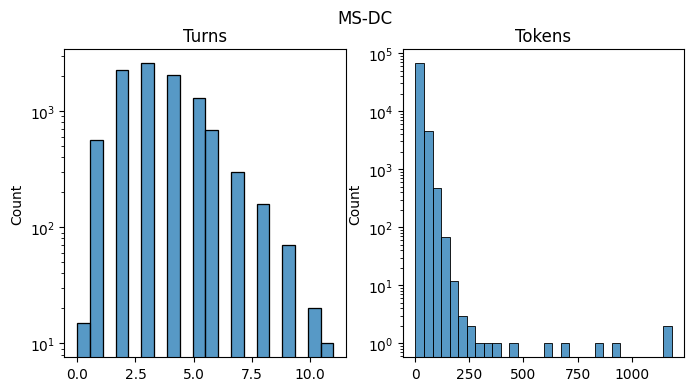

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/MetaLWOZ/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


n_dialogues=37884
total_turns=200167, mean_turns=5.283681765389082, min_turns=5, max_turns=23, var_turns=0.7098055133397616
total_tokens=4401872, mean_tokens=10.995498758536622, min_tokens=2, max_tokens=571, var_tokens=43.51230194977914


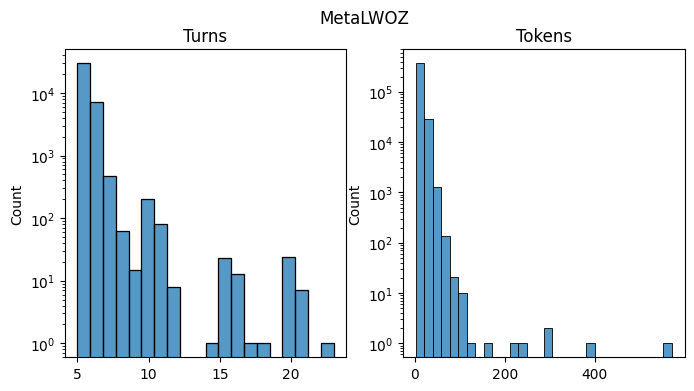

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/MULTIWOZ2_2/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


n_dialogues=8437
total_turns=56776, mean_turns=6.729406187033305, min_turns=1, max_turns=22, var_turns=7.1752085249492765
total_tokens=2145807, mean_tokens=18.897130829928138, min_tokens=3, max_tokens=132, var_tokens=74.6260513705121


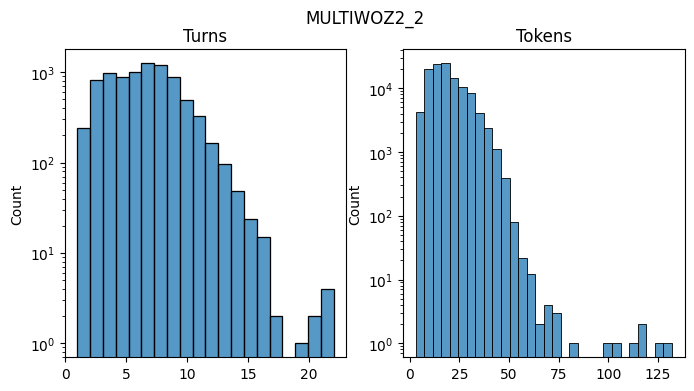

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/SGD/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


n_dialogues=16142
total_turns=164982, mean_turns=10.22066658406641, min_turns=2, max_turns=25, var_turns=11.855779062542155
total_tokens=4711620, mean_tokens=14.279194093901152, min_tokens=3, max_tokens=106, var_tokens=61.779028994961436


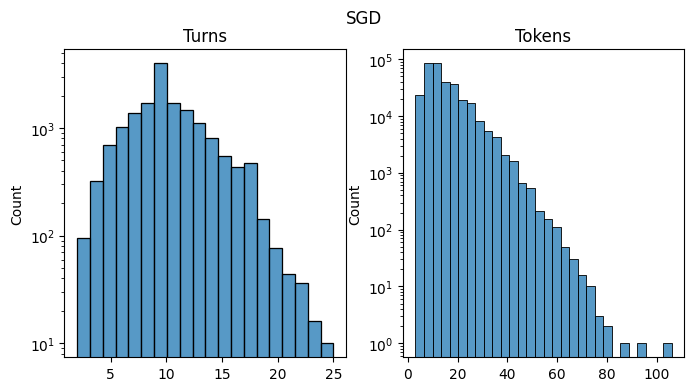

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/SimJointGEN/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


n_dialogues=100000
total_turns=792057, mean_turns=7.92057, min_turns=4, max_turns=16, var_turns=2.6878808751000003
total_tokens=22469833, mean_tokens=14.184479778601792, min_tokens=2, max_tokens=81, var_tokens=152.68556504326125


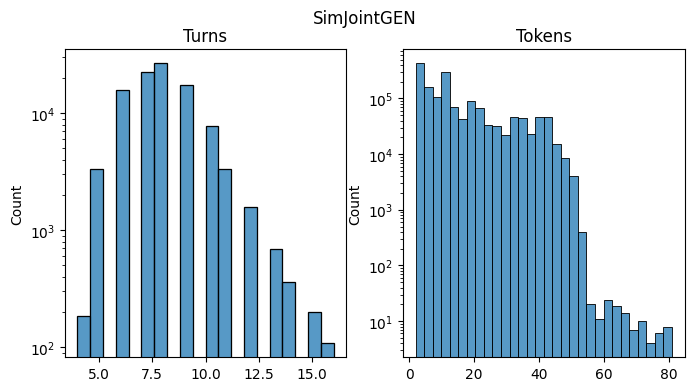

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/KETOD/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


n_dialogues=4247
total_turns=41939, mean_turns=9.874970567459384, min_turns=2, max_turns=15, var_turns=7.197694695389907
total_tokens=1300992, mean_tokens=15.510527194258328, min_tokens=3, max_tokens=137, var_tokens=99.3138630449876


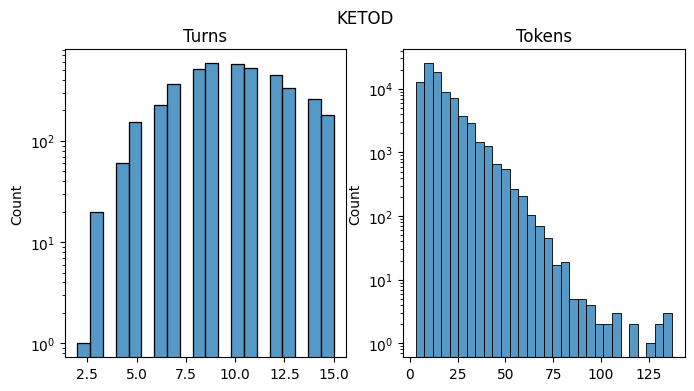

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/FRAMES/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


n_dialogues=1329
total_turns=10094, mean_turns=7.595184349134688, min_turns=1, max_turns=24, var_turns=12.529878991598542
total_tokens=352912, mean_tokens=17.48127600554785, min_tokens=2, max_tokens=152, var_tokens=197.17871618437175


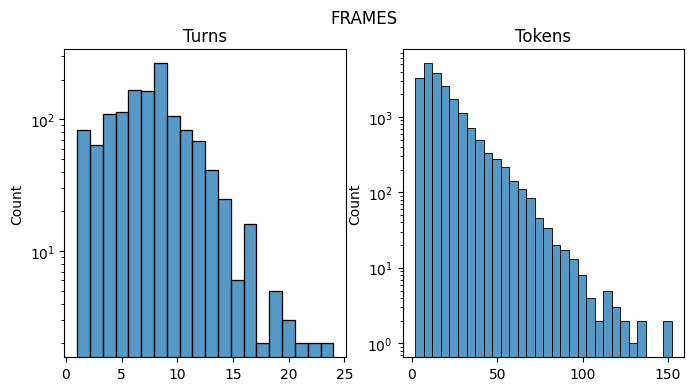

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/Disambiguation/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


n_dialogues=8433
total_turns=56748, mean_turns=6.729277837068659, min_turns=1, max_turns=22, var_turns=7.174308229814746
total_tokens=2225179, mean_tokens=19.605792274617606, min_tokens=3, max_tokens=132, var_tokens=84.86318242192382


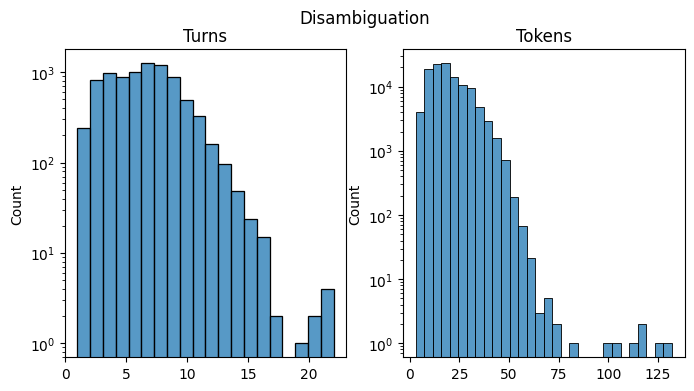

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/ABCD/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


n_dialogues=8034
total_turns=62135, mean_turns=7.734005476723923, min_turns=1, max_turns=23, var_turns=6.1262845038286065
total_tokens=1783999, mean_tokens=14.355830047477268, min_tokens=2, max_tokens=153, var_tokens=110.67411725380704


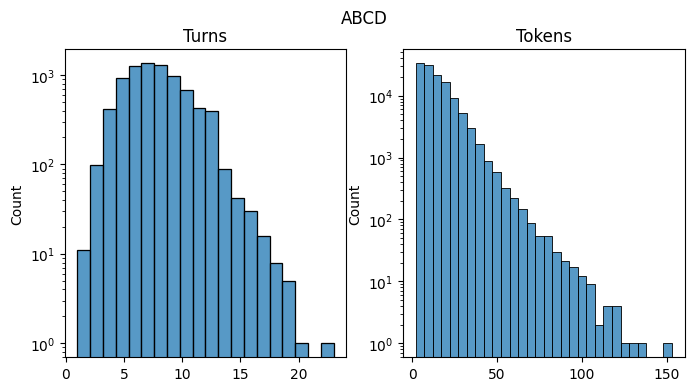

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/AirDialogue/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


n_dialogues=321459
total_turns=2042609, mean_turns=6.3541820263237305, min_turns=1, max_turns=17, var_turns=2.587488934492149
total_tokens=49373290, mean_tokens=12.085839727524945, min_tokens=3, max_tokens=107, var_tokens=46.906074104096746


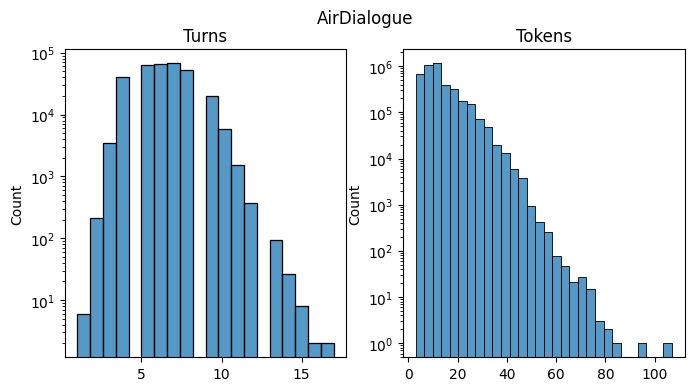

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/BiTOD/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


n_dialogues=2952
total_turns=28946, mean_turns=9.805555555555555, min_turns=2, max_turns=24, var_turns=15.07397997591087
total_tokens=931047, mean_tokens=16.082481171837212, min_tokens=3, max_tokens=181, var_tokens=113.90708824024868


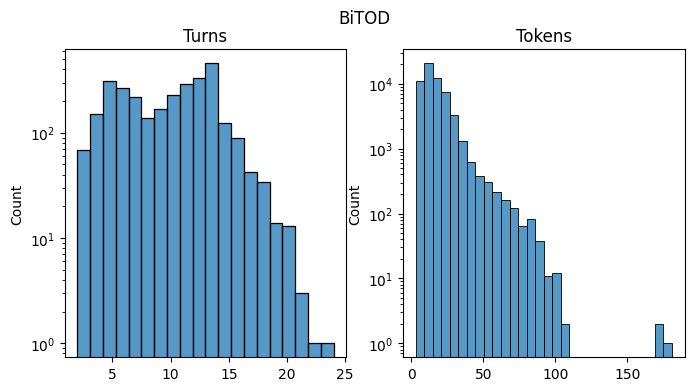

In [25]:
from datasets import load_dataset


names = [
    'MS-DC', 
    'MetaLWOZ',
    'MULTIWOZ2_2',
    'SGD',
    'SimJointGEN',
    'KETOD',
    'FRAMES',
    'Disambiguation',
    'ABCD',
    'AirDialogue',
    'BiTOD'
]

datasets = []
merged_n_turns = []
merged_n_tokens = []
for name in names:
    cur_n_turns, cur_n_tokens = print_statistics(load_dataset('Salesforce/dialogstudio', name)['train']['log'], name)
    merged_n_turns.extend(cur_n_turns)
    merged_n_tokens.extend(cur_n_tokens)

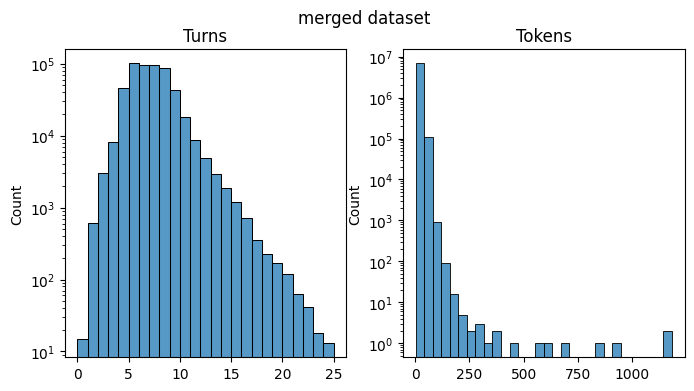

In [27]:
n_turns = merged_n_turns
total_turns = np.sum(n_turns)
mean_turns = np.mean(n_turns)
min_turns = np.min(n_turns)
max_turns = np.max(n_turns)
var_turns = np.var(n_turns)

n_tokens = merged_n_tokens
total_tokens = np.sum(n_tokens)
mean_tokens = np.mean(n_tokens)
min_tokens = np.min(n_tokens)
max_tokens = np.max(n_tokens)
var_tokens = np.var(n_tokens)

fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.histplot(merged_n_turns, ax=ax[0], bins=25)
sns.histplot(merged_n_tokens, ax=ax[1], bins=30)
ax[0].set_title('Turns')
ax[1].set_title('Tokens')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
fig.suptitle('merged dataset')
plt.show()

In [154]:
upper_bounds = {
    'MS-DC': 250,
    'MetaLWOZ': 100,
    'MULTIWOZ2_2': 75,
    'Disambiguation': 60,
}

In [146]:
from collections import defaultdict
import json


too_long = defaultdict(list)
for name, bound in upper_bounds.items():
    dataset = load_dataset('Salesforce/dialogstudio', name)['train']['log']
    for dia in dataset:
        a = any(len(tokenizer(turn['user utterance'])['input_ids']) > bound for turn in dia)
        b = any(len(tokenizer(turn['system response'])['input_ids']) > bound for turn in dia)
        if a or b:    
            too_long[name].append(dia)
# json.dump(too_long, open('too_long.json', 'w'))

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/BiTOD/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


In [147]:
for val in too_long.values():
    print(len(val))

3


In [164]:
def show(name, i, dct):
    dia = dct[name][i]
    res = []
    for turn in dia:
        txt = f'[A] {turn["user utterance"]}\n[B] {turn["system response"]}'
        res.append(txt)
    print('\n'.join(res))

Диалоги со слишком короткими репликами:
- MS-DC, remove all (ошибка вывода)
- MetaLWOZ: remove all (просьба написать рассказ, url ссылки)
- MULTIWOZ2_2: remove all (вывод таблицы расписания поездов)
- Disambiguation: remove all (вывод таблицы расписания поездов)

In [150]:
name = 'BiTOD'
i = 2
show(name, i, too_long)

[A] Hi!  I am looking for restaurant with Vegan options.
[B] Hi there!  Is there any particular location you need it to be in?
[A] Yes.  It would be great if it is near the Central District.
[B] How much of a consideration is price?  Do you have a preference in price range?
[A] I am more concerned with it having at least a 6 rating.  The price does not matter.
[B] Well, there are 109 available restaurants in that area.  I would personally recommend Serendib, which serves Asian food, and has a rating of 10.
[A] Great!  What is the address and phone number of the restaurant?
[B] Let's see...The address is Shop 2, G/F, Nam Wo Hong Building, 148 Wing Lok Street, Sheung Wan.  The phone number is +852 3705 2429.
[A] Awesome!  Sounds great!  I would like to make a reservation at this restaurant for Tuesday at 6:40 pm.
[B] And how many people should that reservation be for?
[A] Let's make it for twenty people.  And the name on the reservation should be Carl.
[B] Great!  Just to confirm:  You w

Диалоги с одной репликой:

In [172]:
too_short = defaultdict(list)
for name in names:
    dataset = load_dataset('Salesforce/dialogstudio', name)['train']['log']
    for dia in dataset:
        if len(dia) == 0:
            too_short[name].append(dia)
        if len(dia) == 1:
            if dia[0]['user utterance'] == '' or dia[0]['system response'] == '':
                too_short[name].append(dia)

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/MS-DC/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)
Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/MetaLWOZ/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)
Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/MULTIWOZ2_2/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)
Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/SGD/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)
Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/SimJointGEN/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)
Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/KETOD/1.0.1/1dc993c7bcf3cb3

In [173]:
for name, val in too_short.items():
    print(name, len(val))

MS-DC 15
FRAMES 2


In [181]:
name = 'FRAMES'
i = 0
show(name, i, too_short)

[A] Hi im looking to go to Fukuoka
[B] 


In [182]:
from tqdm.notebook import tqdm_notebook as tqdm


merged_dataset = []
for name in names:
    dataset = load_dataset('Salesforce/dialogstudio', name)['train']['log']
    res = []
    if name not in upper_bounds.keys():
        for dia in tqdm(dataset, desc=name):
            cur_dia = []
            if len(dia) == 0 or len(dia) == 1 and (dia[0]['user utterance'] == '' or dia[0]['system response'] == ''):
                continue
            for turn in dia:
                ut = turn['user utterance']
                if ut != '':
                    cur_dia.append({'utterance': ut, 'speaker': 0})
                ut = turn['system response']
                if ut != '':
                    cur_dia.append({'utterance': ut, 'speaker': 1})
            res.append(cur_dia)

    else:
        bound = upper_bounds[name]
        for dia in tqdm(dataset, desc=name):
            cur_dia = []
            if len(dia) == 0 or len(dia) == 1 and (dia[0]['user utterance'] == '' or dia[0]['system response'] == ''):
                continue
            for turn in dia:
                ut = turn['user utterance']
                if ut != '' and len(tokenizer(ut)['input_ids']) <= bound:
                    cur_dia.append({'utterance': ut, 'speaker': 0})
                ut = turn['system response']
                if ut != '' and len(tokenizer(ut)['input_ids']) <= bound:
                    cur_dia.append({'utterance': ut, 'speaker': 1})
            res.append(cur_dia)
    merged_dataset.extend(res)            

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/MS-DC/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


MS-DC:   0%|          | 0/10000 [00:00<?, ?it/s]

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/MetaLWOZ/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


MetaLWOZ:   0%|          | 0/37884 [00:00<?, ?it/s]

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/MULTIWOZ2_2/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


MULTIWOZ2_2:   0%|          | 0/8437 [00:00<?, ?it/s]

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/SGD/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


SGD:   0%|          | 0/16142 [00:00<?, ?it/s]

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/SimJointGEN/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


SimJointGEN:   0%|          | 0/100000 [00:00<?, ?it/s]

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/KETOD/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


KETOD:   0%|          | 0/4247 [00:00<?, ?it/s]

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/FRAMES/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


FRAMES:   0%|          | 0/1329 [00:00<?, ?it/s]

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/Disambiguation/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


Disambiguation:   0%|          | 0/8433 [00:00<?, ?it/s]

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/ABCD/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


ABCD:   0%|          | 0/8034 [00:00<?, ?it/s]

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/AirDialogue/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


AirDialogue:   0%|          | 0/321459 [00:00<?, ?it/s]

Reusing dataset dialogstudio (/home/ilya/.cache/huggingface/datasets/Salesforce___dialogstudio/BiTOD/1.0.1/1dc993c7bcf3cb3392bd580ffe241b1c3a9233c2c2829b84d047788f56b099f5)


BiTOD:   0%|          | 0/2952 [00:00<?, ?it/s]

In [183]:
import json

json.dump(merged_dataset, open('aug-data/merged-dataset.json', 'w'))